## Questa cella esegue il login su wandb

In [7]:
import wandb
from wandb import Api
import pandas as pd
import os
import shutil

# === CONFIGURAZIONE ===
sweeps_mapping = {
    "u5b163dg" : "YOLOv11s",
    "f82co65p": "YOLOv11n",
}

ENTITY = "pothole-detector"
PROJECT = "pothole-detector-NatureSR"

# === LOGIN ===
wandb.login(key="fd3c2f891b0f72499c0621ce15f0a8627a8dffa6")

# === SETUP ===
api = Api()

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/lorenzo/.netrc


## Download dei dati da wandb

In [8]:
# === ESTRAZIONE DEI DATI ===
all_runs_data = []

summary_useful = [
    'lr/pg0', 
    'lr/pg1', 
    'lr/pg2', 
    'metrics/mAP50(B)', 
    'metrics/mAP50-95(B)', 
    'metrics/precision(B)', 
    'metrics/recall(B)', 
    'model/GFLOPs', 
    'model/parameters', 
    'model/speed_PyTorch(ms)', 
    'train/box_loss', 
    'train/cls_loss', 
    'train/dfl_loss',
    'val/box_loss',
    'val/cls_loss', 
    'val/dfl_loss',
]

# === CICLO SU TUTTI GLI SWEEP ===
# Carica sweep

OUTPUT_DIR = {sweep_id: f"results/{name}" for sweep_id, name in sweeps_mapping.items()}

for sweep_id in sweeps_mapping:
    out_dir = OUTPUT_DIR[sweep_id]
    os.makedirs(out_dir, exist_ok=True)
    print(f"\n📦 Sweep {sweep_id} → output in '{out_dir}'")
    
    try:
        sweep = api.sweep(f"{ENTITY}/{PROJECT}/{sweep_id}")
        runs = sweep.runs
        print(f"🔍 Trovati {len(runs)} run")
        
        for run in runs:
            run_id = run.id
            run_name = run.name or run_id
            found_files = []
            
            print(f"🔄 Analizzo run: {run_name}")
            
            # Elenca tutti gli artifacts del run
            artifacts = run.logged_artifacts()
            print(f"   📁 Trovati {len(artifacts)} artifacts")
            
            for artifact in artifacts:
                # Filtra solo gli artifacts che terminano con "_log"
                if not artifact.name.split(':')[0].endswith('_log'):
                    continue
                    
                print(f"   🔍 Controllo artifact: {artifact.name}")
                
                # Scarica l'artifact
                try:
                    artifact_dir = artifact.download()
                    print(f"   ⬇️ Scaricato in: {artifact_dir}")
                    
                    # Cerca results.csv in modo ricorsivo
                    for root, dirs, files in os.walk(artifact_dir):
                        for file in files:
                            if file == "results.csv":
                                results_path = os.path.join(root, file)
                                # Crea un nome file unico che include l'artifact
                                artifact_name_clean = artifact.name.replace(":", "_").replace("/", "_")
                                output_filename = f"{run_name}_{run_id}_{artifact_name_clean}_results.csv"
                                output_path = os.path.join(out_dir, output_filename)
                                
                                shutil.copy(results_path, output_path)
                                print(f"   ✅ Salvato: {output_path}")
                                found_files.append(output_path)
                                
                except Exception as e:
                    print(f"   ❌ Errore scaricando artifact {artifact.name}: {e}")
            
            if not found_files:
                print("   ⚠️ Nessun 'results.csv' trovato in nessun artifact.")
            else:
                print(f"   🎉 Trovati {len(found_files)} file results.csv")
                
    except Exception as e:
        print(f"❌ Errore nello sweep {sweep_id}: {e}")

print("\n🏁 Download completato!")


# === SALVATAGGIO COMPLETO ===
#df_all = pd.DataFrame(all_runs_data)
#df_all.to_csv(os.path.join(EXPORT_DIR, "sweep_results.csv"), index=False)
#print(f"\n📦 File completo salvato: sweep_results.csv con {len(df_all)} run")
#
## === STATISTICHE DESCRITTIVE GLOBALI ===
#desc = df_all.describe(include='all')
#desc.to_csv(os.path.join(EXPORT_DIR, "summary_statistics.csv"))
#print("📊 Statistiche descrittive salvate.")


📦 Sweep u5b163dg → output in 'results/YOLOv11s'
🔍 Trovati 15 run
🔄 Analizzo run: dandy-sweep-15
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v33


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v33
   ✅ Salvato: results/YOLOv11s/dandy-sweep-15_ndtylyj2_fold0_log_v33_results.csv
   🔍 Controllo artifact: fold1_log:v33


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v33
   ✅ Salvato: results/YOLOv11s/dandy-sweep-15_ndtylyj2_fold1_log_v33_results.csv
   🔍 Controllo artifact: fold2_log:v33


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v33
   ✅ Salvato: results/YOLOv11s/dandy-sweep-15_ndtylyj2_fold2_log_v33_results.csv
   🔍 Controllo artifact: fold3_log:v33


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v33
   ✅ Salvato: results/YOLOv11s/dandy-sweep-15_ndtylyj2_fold3_log_v33_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: twilight-sweep-14
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold1_log:v32


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v32
   ✅ Salvato: results/YOLOv11s/twilight-sweep-14_dhjbjm1m_fold1_log_v32_results.csv
   🔍 Controllo artifact: fold2_log:v32


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v32
   ✅ Salvato: results/YOLOv11s/twilight-sweep-14_dhjbjm1m_fold2_log_v32_results.csv
   🔍 Controllo artifact: fold3_log:v32


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v32
   ✅ Salvato: results/YOLOv11s/twilight-sweep-14_dhjbjm1m_fold3_log_v32_results.csv
   🔍 Controllo artifact: fold0_log:v32


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v32
   ✅ Salvato: results/YOLOv11s/twilight-sweep-14_dhjbjm1m_fold0_log_v32_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: cosmic-sweep-13
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v31


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v31
   ✅ Salvato: results/YOLOv11s/cosmic-sweep-13_wwwhn2dt_fold0_log_v31_results.csv
   🔍 Controllo artifact: fold1_log:v31


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v31
   ✅ Salvato: results/YOLOv11s/cosmic-sweep-13_wwwhn2dt_fold1_log_v31_results.csv
   🔍 Controllo artifact: fold2_log:v31


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v31
   ✅ Salvato: results/YOLOv11s/cosmic-sweep-13_wwwhn2dt_fold2_log_v31_results.csv
   🔍 Controllo artifact: fold3_log:v31


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v31
   ✅ Salvato: results/YOLOv11s/cosmic-sweep-13_wwwhn2dt_fold3_log_v31_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: clear-sweep-12
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v30


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v30
   ✅ Salvato: results/YOLOv11s/clear-sweep-12_nxy2giks_fold0_log_v30_results.csv
   🔍 Controllo artifact: fold1_log:v30


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v30
   ✅ Salvato: results/YOLOv11s/clear-sweep-12_nxy2giks_fold1_log_v30_results.csv
   🔍 Controllo artifact: fold2_log:v30


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v30
   ✅ Salvato: results/YOLOv11s/clear-sweep-12_nxy2giks_fold2_log_v30_results.csv
   🔍 Controllo artifact: fold3_log:v30


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v30
   ✅ Salvato: results/YOLOv11s/clear-sweep-12_nxy2giks_fold3_log_v30_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: pretty-sweep-11
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v29


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v29
   ✅ Salvato: results/YOLOv11s/pretty-sweep-11_qi9ggfkt_fold0_log_v29_results.csv
   🔍 Controllo artifact: fold1_log:v29


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v29
   ✅ Salvato: results/YOLOv11s/pretty-sweep-11_qi9ggfkt_fold1_log_v29_results.csv
   🔍 Controllo artifact: fold2_log:v29


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v29
   ✅ Salvato: results/YOLOv11s/pretty-sweep-11_qi9ggfkt_fold2_log_v29_results.csv
   🔍 Controllo artifact: fold3_log:v29


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v29
   ✅ Salvato: results/YOLOv11s/pretty-sweep-11_qi9ggfkt_fold3_log_v29_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: royal-sweep-10
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v28


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v28
   ✅ Salvato: results/YOLOv11s/royal-sweep-10_3baxdv6c_fold0_log_v28_results.csv
   🔍 Controllo artifact: fold1_log:v28


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v28
   ✅ Salvato: results/YOLOv11s/royal-sweep-10_3baxdv6c_fold1_log_v28_results.csv
   🔍 Controllo artifact: fold2_log:v28


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v28
   ✅ Salvato: results/YOLOv11s/royal-sweep-10_3baxdv6c_fold2_log_v28_results.csv
   🔍 Controllo artifact: fold3_log:v28


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v28
   ✅ Salvato: results/YOLOv11s/royal-sweep-10_3baxdv6c_fold3_log_v28_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: spring-sweep-9
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v27


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v27
   ✅ Salvato: results/YOLOv11s/spring-sweep-9_xd1zwqdv_fold0_log_v27_results.csv
   🔍 Controllo artifact: fold1_log:v27


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v27
   ✅ Salvato: results/YOLOv11s/spring-sweep-9_xd1zwqdv_fold1_log_v27_results.csv
   🔍 Controllo artifact: fold2_log:v27


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v27
   ✅ Salvato: results/YOLOv11s/spring-sweep-9_xd1zwqdv_fold2_log_v27_results.csv
   🔍 Controllo artifact: fold3_log:v27


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v27
   ✅ Salvato: results/YOLOv11s/spring-sweep-9_xd1zwqdv_fold3_log_v27_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: copper-sweep-8
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v26


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v26
   ✅ Salvato: results/YOLOv11s/copper-sweep-8_nyppd0jc_fold0_log_v26_results.csv
   🔍 Controllo artifact: fold1_log:v26


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v26
   ✅ Salvato: results/YOLOv11s/copper-sweep-8_nyppd0jc_fold1_log_v26_results.csv
   🔍 Controllo artifact: fold2_log:v26


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v26
   ✅ Salvato: results/YOLOv11s/copper-sweep-8_nyppd0jc_fold2_log_v26_results.csv
   🔍 Controllo artifact: fold3_log:v26


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v26
   ✅ Salvato: results/YOLOv11s/copper-sweep-8_nyppd0jc_fold3_log_v26_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: mild-sweep-7
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v25


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v25
   ✅ Salvato: results/YOLOv11s/mild-sweep-7_xme1syz0_fold0_log_v25_results.csv
   🔍 Controllo artifact: fold1_log:v25


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v25
   ✅ Salvato: results/YOLOv11s/mild-sweep-7_xme1syz0_fold1_log_v25_results.csv
   🔍 Controllo artifact: fold2_log:v25


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v25
   ✅ Salvato: results/YOLOv11s/mild-sweep-7_xme1syz0_fold2_log_v25_results.csv
   🔍 Controllo artifact: fold3_log:v25


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v25
   ✅ Salvato: results/YOLOv11s/mild-sweep-7_xme1syz0_fold3_log_v25_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: divine-sweep-6
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v24


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v24
   ✅ Salvato: results/YOLOv11s/divine-sweep-6_ijhpguhe_fold0_log_v24_results.csv
   🔍 Controllo artifact: fold1_log:v24


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v24
   ✅ Salvato: results/YOLOv11s/divine-sweep-6_ijhpguhe_fold1_log_v24_results.csv
   🔍 Controllo artifact: fold2_log:v24


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v24
   ✅ Salvato: results/YOLOv11s/divine-sweep-6_ijhpguhe_fold2_log_v24_results.csv
   🔍 Controllo artifact: fold3_log:v24


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v24
   ✅ Salvato: results/YOLOv11s/divine-sweep-6_ijhpguhe_fold3_log_v24_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: robust-sweep-5
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v23


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v23
   ✅ Salvato: results/YOLOv11s/robust-sweep-5_aux14hm1_fold0_log_v23_results.csv
   🔍 Controllo artifact: fold1_log:v23


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v23
   ✅ Salvato: results/YOLOv11s/robust-sweep-5_aux14hm1_fold1_log_v23_results.csv
   🔍 Controllo artifact: fold2_log:v23


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v23
   ✅ Salvato: results/YOLOv11s/robust-sweep-5_aux14hm1_fold2_log_v23_results.csv
   🔍 Controllo artifact: fold3_log:v23


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v23
   ✅ Salvato: results/YOLOv11s/robust-sweep-5_aux14hm1_fold3_log_v23_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: radiant-sweep-4
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v22


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v22
   ✅ Salvato: results/YOLOv11s/radiant-sweep-4_fiqbcygi_fold0_log_v22_results.csv
   🔍 Controllo artifact: fold2_log:v22


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v22
   ✅ Salvato: results/YOLOv11s/radiant-sweep-4_fiqbcygi_fold2_log_v22_results.csv
   🔍 Controllo artifact: fold1_log:v22


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v22
   ✅ Salvato: results/YOLOv11s/radiant-sweep-4_fiqbcygi_fold1_log_v22_results.csv
   🔍 Controllo artifact: fold3_log:v22


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v22
   ✅ Salvato: results/YOLOv11s/radiant-sweep-4_fiqbcygi_fold3_log_v22_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: mild-sweep-3
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v21


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v21
   ✅ Salvato: results/YOLOv11s/mild-sweep-3_a1gr1rnj_fold0_log_v21_results.csv
   🔍 Controllo artifact: fold1_log:v21


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v21
   ✅ Salvato: results/YOLOv11s/mild-sweep-3_a1gr1rnj_fold1_log_v21_results.csv
   🔍 Controllo artifact: fold2_log:v21


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v21
   ✅ Salvato: results/YOLOv11s/mild-sweep-3_a1gr1rnj_fold2_log_v21_results.csv
   🔍 Controllo artifact: fold3_log:v21


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v21
   ✅ Salvato: results/YOLOv11s/mild-sweep-3_a1gr1rnj_fold3_log_v21_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: dauntless-sweep-2
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v20


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v20
   ✅ Salvato: results/YOLOv11s/dauntless-sweep-2_cetgeypv_fold0_log_v20_results.csv
   🔍 Controllo artifact: fold1_log:v20


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v20
   ✅ Salvato: results/YOLOv11s/dauntless-sweep-2_cetgeypv_fold1_log_v20_results.csv
   🔍 Controllo artifact: fold2_log:v20


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v20
   ✅ Salvato: results/YOLOv11s/dauntless-sweep-2_cetgeypv_fold2_log_v20_results.csv
   🔍 Controllo artifact: fold3_log:v20


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v20
   ✅ Salvato: results/YOLOv11s/dauntless-sweep-2_cetgeypv_fold3_log_v20_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: blooming-sweep-1
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v19


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v19
   ✅ Salvato: results/YOLOv11s/blooming-sweep-1_f7zhibfd_fold0_log_v19_results.csv
   🔍 Controllo artifact: fold1_log:v19


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v19
   ✅ Salvato: results/YOLOv11s/blooming-sweep-1_f7zhibfd_fold1_log_v19_results.csv
   🔍 Controllo artifact: fold2_log:v19


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v19
   ✅ Salvato: results/YOLOv11s/blooming-sweep-1_f7zhibfd_fold2_log_v19_results.csv
   🔍 Controllo artifact: fold3_log:v19


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v19
   ✅ Salvato: results/YOLOv11s/blooming-sweep-1_f7zhibfd_fold3_log_v19_results.csv
   🎉 Trovati 4 file results.csv

📦 Sweep f82co65p → output in 'results/YOLOv11n'
🔍 Trovati 15 run
🔄 Analizzo run: rosy-sweep-15
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v14


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v14
   ✅ Salvato: results/YOLOv11n/rosy-sweep-15_lx7xg29f_fold0_log_v14_results.csv
   🔍 Controllo artifact: fold1_log:v14


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v14
   ✅ Salvato: results/YOLOv11n/rosy-sweep-15_lx7xg29f_fold1_log_v14_results.csv
   🔍 Controllo artifact: fold2_log:v14


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v14
   ✅ Salvato: results/YOLOv11n/rosy-sweep-15_lx7xg29f_fold2_log_v14_results.csv
   🔍 Controllo artifact: fold3_log:v14


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v14
   ✅ Salvato: results/YOLOv11n/rosy-sweep-15_lx7xg29f_fold3_log_v14_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: lyric-sweep-14
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v13


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v13
   ✅ Salvato: results/YOLOv11n/lyric-sweep-14_vbhhpdh3_fold0_log_v13_results.csv
   🔍 Controllo artifact: fold1_log:v13


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v13
   ✅ Salvato: results/YOLOv11n/lyric-sweep-14_vbhhpdh3_fold1_log_v13_results.csv
   🔍 Controllo artifact: fold2_log:v13


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v13
   ✅ Salvato: results/YOLOv11n/lyric-sweep-14_vbhhpdh3_fold2_log_v13_results.csv
   🔍 Controllo artifact: fold3_log:v13


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v13
   ✅ Salvato: results/YOLOv11n/lyric-sweep-14_vbhhpdh3_fold3_log_v13_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: vital-sweep-13
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v12


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v12
   ✅ Salvato: results/YOLOv11n/vital-sweep-13_at4gvmnc_fold0_log_v12_results.csv
   🔍 Controllo artifact: fold1_log:v12


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v12
   ✅ Salvato: results/YOLOv11n/vital-sweep-13_at4gvmnc_fold1_log_v12_results.csv
   🔍 Controllo artifact: fold2_log:v12


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v12
   ✅ Salvato: results/YOLOv11n/vital-sweep-13_at4gvmnc_fold2_log_v12_results.csv
   🔍 Controllo artifact: fold3_log:v12


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v12
   ✅ Salvato: results/YOLOv11n/vital-sweep-13_at4gvmnc_fold3_log_v12_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: vivid-sweep-12
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v11


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v11
   ✅ Salvato: results/YOLOv11n/vivid-sweep-12_boqn4ub0_fold0_log_v11_results.csv
   🔍 Controllo artifact: fold1_log:v11


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v11
   ✅ Salvato: results/YOLOv11n/vivid-sweep-12_boqn4ub0_fold1_log_v11_results.csv
   🔍 Controllo artifact: fold2_log:v11


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v11
   ✅ Salvato: results/YOLOv11n/vivid-sweep-12_boqn4ub0_fold2_log_v11_results.csv
   🔍 Controllo artifact: fold3_log:v11


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v11
   ✅ Salvato: results/YOLOv11n/vivid-sweep-12_boqn4ub0_fold3_log_v11_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: winter-sweep-11
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v10


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v10
   ✅ Salvato: results/YOLOv11n/winter-sweep-11_04tnxm1k_fold0_log_v10_results.csv
   🔍 Controllo artifact: fold1_log:v10


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v10
   ✅ Salvato: results/YOLOv11n/winter-sweep-11_04tnxm1k_fold1_log_v10_results.csv
   🔍 Controllo artifact: fold2_log:v10


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v10
   ✅ Salvato: results/YOLOv11n/winter-sweep-11_04tnxm1k_fold2_log_v10_results.csv
   🔍 Controllo artifact: fold3_log:v10


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v10
   ✅ Salvato: results/YOLOv11n/winter-sweep-11_04tnxm1k_fold3_log_v10_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: elated-sweep-10
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v9


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v9
   ✅ Salvato: results/YOLOv11n/elated-sweep-10_o1k85o6c_fold0_log_v9_results.csv
   🔍 Controllo artifact: fold1_log:v9


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v9
   ✅ Salvato: results/YOLOv11n/elated-sweep-10_o1k85o6c_fold1_log_v9_results.csv
   🔍 Controllo artifact: fold2_log:v9


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v9
   ✅ Salvato: results/YOLOv11n/elated-sweep-10_o1k85o6c_fold2_log_v9_results.csv
   🔍 Controllo artifact: fold3_log:v9


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v9
   ✅ Salvato: results/YOLOv11n/elated-sweep-10_o1k85o6c_fold3_log_v9_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: dainty-sweep-9
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v8


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v8
   ✅ Salvato: results/YOLOv11n/dainty-sweep-9_fuv6z94d_fold0_log_v8_results.csv
   🔍 Controllo artifact: fold1_log:v8


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v8
   ✅ Salvato: results/YOLOv11n/dainty-sweep-9_fuv6z94d_fold1_log_v8_results.csv
   🔍 Controllo artifact: fold2_log:v8


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v8
   ✅ Salvato: results/YOLOv11n/dainty-sweep-9_fuv6z94d_fold2_log_v8_results.csv
   🔍 Controllo artifact: fold3_log:v8


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v8
   ✅ Salvato: results/YOLOv11n/dainty-sweep-9_fuv6z94d_fold3_log_v8_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: worthy-sweep-8
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v7


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v7
   ✅ Salvato: results/YOLOv11n/worthy-sweep-8_d1j8qdb2_fold0_log_v7_results.csv
   🔍 Controllo artifact: fold1_log:v7


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v7
   ✅ Salvato: results/YOLOv11n/worthy-sweep-8_d1j8qdb2_fold1_log_v7_results.csv
   🔍 Controllo artifact: fold2_log:v7


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v7
   ✅ Salvato: results/YOLOv11n/worthy-sweep-8_d1j8qdb2_fold2_log_v7_results.csv
   🔍 Controllo artifact: fold3_log:v7


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v7
   ✅ Salvato: results/YOLOv11n/worthy-sweep-8_d1j8qdb2_fold3_log_v7_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: logical-sweep-7
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v6


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v6
   ✅ Salvato: results/YOLOv11n/logical-sweep-7_0y4niaq4_fold0_log_v6_results.csv
   🔍 Controllo artifact: fold1_log:v6


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v6
   ✅ Salvato: results/YOLOv11n/logical-sweep-7_0y4niaq4_fold1_log_v6_results.csv
   🔍 Controllo artifact: fold2_log:v6


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v6
   ✅ Salvato: results/YOLOv11n/logical-sweep-7_0y4niaq4_fold2_log_v6_results.csv
   🔍 Controllo artifact: fold3_log:v6


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v6
   ✅ Salvato: results/YOLOv11n/logical-sweep-7_0y4niaq4_fold3_log_v6_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: dandy-sweep-6
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v5


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v5
   ✅ Salvato: results/YOLOv11n/dandy-sweep-6_d7xme7yu_fold0_log_v5_results.csv
   🔍 Controllo artifact: fold1_log:v5


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v5
   ✅ Salvato: results/YOLOv11n/dandy-sweep-6_d7xme7yu_fold1_log_v5_results.csv
   🔍 Controllo artifact: fold2_log:v5


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v5
   ✅ Salvato: results/YOLOv11n/dandy-sweep-6_d7xme7yu_fold2_log_v5_results.csv
   🔍 Controllo artifact: fold3_log:v5


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v5
   ✅ Salvato: results/YOLOv11n/dandy-sweep-6_d7xme7yu_fold3_log_v5_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: super-sweep-5
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v4


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v4
   ✅ Salvato: results/YOLOv11n/super-sweep-5_h5layrxy_fold0_log_v4_results.csv
   🔍 Controllo artifact: fold1_log:v4


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v4
   ✅ Salvato: results/YOLOv11n/super-sweep-5_h5layrxy_fold1_log_v4_results.csv
   🔍 Controllo artifact: fold2_log:v4


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v4
   ✅ Salvato: results/YOLOv11n/super-sweep-5_h5layrxy_fold2_log_v4_results.csv
   🔍 Controllo artifact: fold3_log:v4


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v4
   ✅ Salvato: results/YOLOv11n/super-sweep-5_h5layrxy_fold3_log_v4_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: misunderstood-sweep-4
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v3


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v3
   ✅ Salvato: results/YOLOv11n/misunderstood-sweep-4_8i8zwhqk_fold0_log_v3_results.csv
   🔍 Controllo artifact: fold1_log:v3


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v3
   ✅ Salvato: results/YOLOv11n/misunderstood-sweep-4_8i8zwhqk_fold1_log_v3_results.csv
   🔍 Controllo artifact: fold2_log:v3


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v3
   ✅ Salvato: results/YOLOv11n/misunderstood-sweep-4_8i8zwhqk_fold2_log_v3_results.csv
   🔍 Controllo artifact: fold3_log:v3


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v3
   ✅ Salvato: results/YOLOv11n/misunderstood-sweep-4_8i8zwhqk_fold3_log_v3_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: fearless-sweep-3
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v2


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v2
   ✅ Salvato: results/YOLOv11n/fearless-sweep-3_b7dei5to_fold0_log_v2_results.csv
   🔍 Controllo artifact: fold1_log:v2


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v2
   ✅ Salvato: results/YOLOv11n/fearless-sweep-3_b7dei5to_fold1_log_v2_results.csv
   🔍 Controllo artifact: fold2_log:v2


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v2
   ✅ Salvato: results/YOLOv11n/fearless-sweep-3_b7dei5to_fold2_log_v2_results.csv
   🔍 Controllo artifact: fold3_log:v2


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v2
   ✅ Salvato: results/YOLOv11n/fearless-sweep-3_b7dei5to_fold3_log_v2_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: logical-sweep-2
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v1


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v1
   ✅ Salvato: results/YOLOv11n/logical-sweep-2_nexrfefx_fold0_log_v1_results.csv
   🔍 Controllo artifact: fold1_log:v1


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v1
   ✅ Salvato: results/YOLOv11n/logical-sweep-2_nexrfefx_fold1_log_v1_results.csv
   🔍 Controllo artifact: fold2_log:v1


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v1
   ✅ Salvato: results/YOLOv11n/logical-sweep-2_nexrfefx_fold2_log_v1_results.csv
   🔍 Controllo artifact: fold3_log:v1


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v1
   ✅ Salvato: results/YOLOv11n/logical-sweep-2_nexrfefx_fold3_log_v1_results.csv
   🎉 Trovati 4 file results.csv
🔄 Analizzo run: sparkling-sweep-1
   📁 Trovati 5 artifacts
   🔍 Controllo artifact: fold0_log:v0


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold0_log:v0
   ✅ Salvato: results/YOLOv11n/sparkling-sweep-1_zepjk15r_fold0_log_v0_results.csv
   🔍 Controllo artifact: fold1_log:v0


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold1_log:v0
   ✅ Salvato: results/YOLOv11n/sparkling-sweep-1_zepjk15r_fold1_log_v0_results.csv
   🔍 Controllo artifact: fold2_log:v0


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold2_log:v0
   ✅ Salvato: results/YOLOv11n/sparkling-sweep-1_zepjk15r_fold2_log_v0_results.csv
   🔍 Controllo artifact: fold3_log:v0


wandb:   1 of 1 files downloaded.  


   ⬇️ Scaricato in: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/artifacts/fold3_log:v0
   ✅ Salvato: results/YOLOv11n/sparkling-sweep-1_zepjk15r_fold3_log_v0_results.csv
   🎉 Trovati 4 file results.csv

🏁 Download completato!


In [6]:
import pandas as pd
import os
import re
from pathlib import Path

def load_all_results_to_dataframe(base_directory="results"):
    """
    Carica tutti i CSV dai risultati degli sweep in un singolo DataFrame.
    
    Args:
        base_directory: Directory base contenente le cartelle dei modelli
    
    Returns:
        pandas.DataFrame: DataFrame combinato con tutti i risultati
    """
    
    all_data = []
    
    # Scorri tutte le directory dei modelli
    for model_dir in os.listdir(base_directory):
        model_path = os.path.join(base_directory, model_dir)
        
        if not os.path.isdir(model_path):
            continue
            
        print(f"🔍 Processando modello: {model_dir}")
        
        # Scorri tutti i file CSV nella directory del modello
        csv_files = [f for f in os.listdir(model_path) if f.endswith('.csv')]
        print(f"   📁 Trovati {len(csv_files)} file CSV")
        
        for csv_file in csv_files:
            # Estrai informazioni dal nome del file
            # Formato: nome-sweep-X_codice_foldY_log_vZ_results.csv
            match = re.match(r'(.+?)_([a-z0-9]+)_(fold\d+)_log_v\d+_results\.csv', csv_file)
            
            if not match:
                print(f"   ⚠️ Formato nome file non riconosciuto: {csv_file}")
                continue
                
            run_name = match.group(1)
            run_code = match.group(2)
            fold = match.group(3)
            
            # Carica il CSV
            csv_path = os.path.join(model_path, csv_file)
            try:
                df = pd.read_csv(csv_path)
                
                # Aggiungi le colonne identificative
                df['model'] = model_dir
                df['run_name'] = run_name
                df['run_code'] = run_code
                df['fold'] = fold
                df['fold_number'] = int(fold.replace('fold', ''))
                
                # Aggiungi alla lista
                all_data.append(df)
                
                print(f"   ✅ Caricato: {csv_file} ({len(df)} righe)")
                
            except Exception as e:
                print(f"   ❌ Errore caricando {csv_file}: {e}")
    
    if not all_data:
        print("❌ Nessun dato trovato!")
        return pd.DataFrame()
    
    # Combina tutti i DataFrame
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Riordina le colonne mettendo le identificative all'inizio
    id_columns = ['model', 'run_name', 'run_code', 'fold', 'fold_number']
    other_columns = [col for col in combined_df.columns if col not in id_columns]
    combined_df = combined_df[id_columns + other_columns]
    
    print(f"\n🎉 DataFrame combinato creato!")
    print(f"   📊 Totale righe: {len(combined_df)}")
    print(f"   📈 Modelli: {combined_df['model'].nunique()}")
    print(f"   🏃 Run unici: {combined_df['run_code'].nunique()}")
    print(f"   📂 Fold: {sorted(combined_df['fold'].unique())}")
    
    return combined_df

def get_summary_statistics(df):
    """
    Genera statistiche riassuntive del dataset.
    
    Args:
        df: DataFrame combinato
    
    Returns:
        dict: Dizionario con statistiche
    """
    
    summary = {
        'total_rows': len(df),
        'total_models': df['model'].nunique(),
        'total_runs': df['run_code'].nunique(),
        'models_list': df['model'].unique().tolist(),
        'runs_per_model': df.groupby('model')['run_code'].nunique().to_dict(),
        'epochs_per_run_fold': df.groupby(['run_code', 'fold'])['epoch'].count().describe(),
        'max_epochs': df.groupby(['run_code', 'fold'])['epoch'].max().describe()
    }
    
    return summary

# Esempio di utilizzo
if __name__ == "__main__":
    # Carica tutti i dati
    df = load_all_results_to_dataframe("results")
    
    if not df.empty:
        # Mostra informazioni base
        print(f"\n📋 Struttura DataFrame:")
        print(f"   Shape: {df.shape}")
        print(f"   Colonne: {list(df.columns)}")
        
        # Mostra alcuni esempi
        print(f"\n🔍 Prime 5 righe:")
        print(df.head())

        # Statistiche riassuntive
        print(f"\n📊 Statistiche per modello:")
        print(df.groupby(['model', 'run_name', 'fold']).size().head(10))
        
        # Salva il DataFrame combinato
        output_path = "combined_results.csv"
        df.to_csv(output_path, index=False)
        print(f"\n💾 DataFrame salvato in: {output_path}")
        
        # Genera statistiche
        stats = get_summary_statistics(df)
        print(f"\n📈 Statistiche riassuntive:")
        for key, value in stats.items():
            if key != 'epochs_per_run_fold' and key != 'max_epochs':
                print(f"   {key}: {value}")

🔍 Processando modello: YOLOv8n
   📁 Trovati 0 file CSV
🔍 Processando modello: MobileNetv3-SSD320
   📁 Trovati 0 file CSV
🔍 Processando modello: YOLOv11s
   📁 Trovati 60 file CSV
   ✅ Caricato: mild-sweep-7_xme1syz0_fold2_log_v25_results.csv (36 righe)
   ✅ Caricato: robust-sweep-5_aux14hm1_fold0_log_v23_results.csv (33 righe)
   ✅ Caricato: dauntless-sweep-2_cetgeypv_fold1_log_v20_results.csv (89 righe)
   ✅ Caricato: radiant-sweep-4_fiqbcygi_fold3_log_v22_results.csv (100 righe)
   ✅ Caricato: spring-sweep-9_xd1zwqdv_fold2_log_v27_results.csv (53 righe)
   ✅ Caricato: cosmic-sweep-13_wwwhn2dt_fold3_log_v31_results.csv (64 righe)
   ✅ Caricato: clear-sweep-12_nxy2giks_fold3_log_v30_results.csv (76 righe)
   ✅ Caricato: divine-sweep-6_ijhpguhe_fold1_log_v24_results.csv (70 righe)
   ✅ Caricato: mild-sweep-7_xme1syz0_fold1_log_v25_results.csv (41 righe)
   ✅ Caricato: dandy-sweep-15_ndtylyj2_fold0_log_v33_results.csv (76 righe)
   ✅ Caricato: twilight-sweep-14_dhjbjm1m_fold3_log_v32_resu

In [7]:
df.head()

,model,run_name,run_code,fold,fold_number,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,YOLOv11s,mild-sweep-7,xme1syz0,fold2,2,1,46.4592,2.72694,4.52210,2.15230,0.22573,0.26301,0.17244,0.06604,2.27710,2.75805,1.92955,0.067692,0.000675,0.000675
1,YOLOv11s,mild-sweep-7,xme1syz0,fold2,2,2,88.9148,2.19113,2.51462,1.72669,0.39104,0.36855,0.30939,0.12441,2.13945,2.16566,1.70957,0.035028,0.001344,0.001344
2,YOLOv11s,mild-sweep-7,xme1syz0,fold2,2,3,128.9730,2.09919,2.19434,1.59893,0.35499,0.36924,0.32760,0.13290,2.12736,2.17802,1.66327,0.002351,0.002001,0.002001
3,YOLOv11s,mild-sweep-7,xme1syz0,fold2,2,4,168.5210,2.05871,2.04827,1.54058,0.41690,0.39079,0.35644,0.15300,2.08124,2.04832,1.59599,0.001989,0.001989,0.001989
4,YOLOv11s,mild-sweep-7,xme1syz0,fold2,2,5,210.1230,1.99023,1.92364,1.49452,0.45971,0.43883,0.41268,0.17295,2.04582,2.00632,1.56913,0.001970,0.001970,0.001970


## Analisi esplorativa dei dati degli sweeps

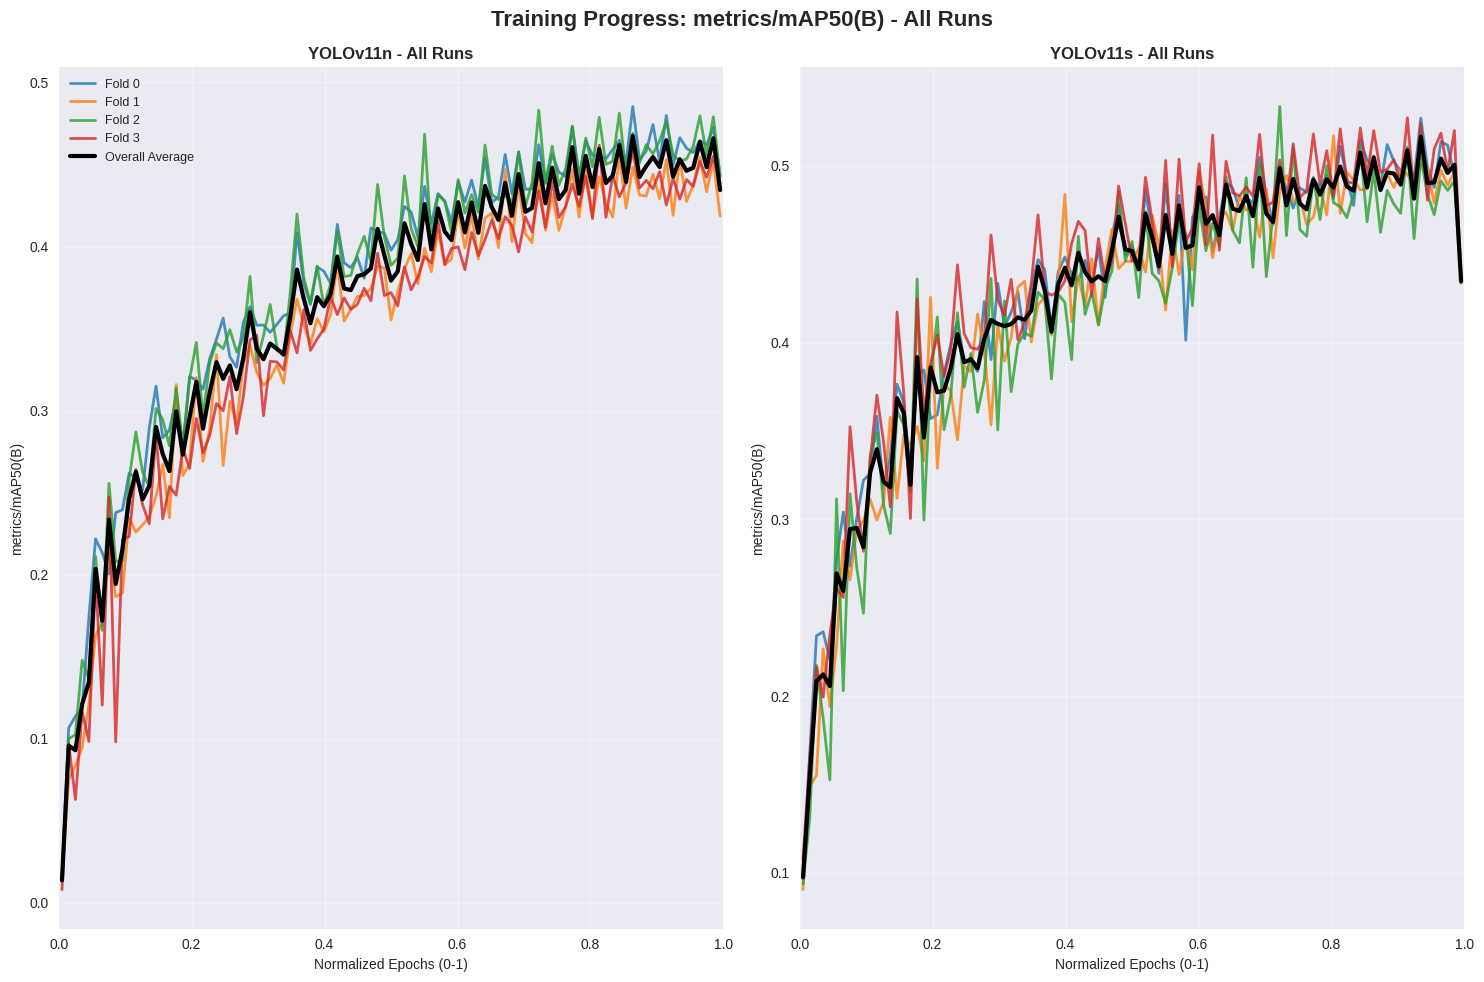

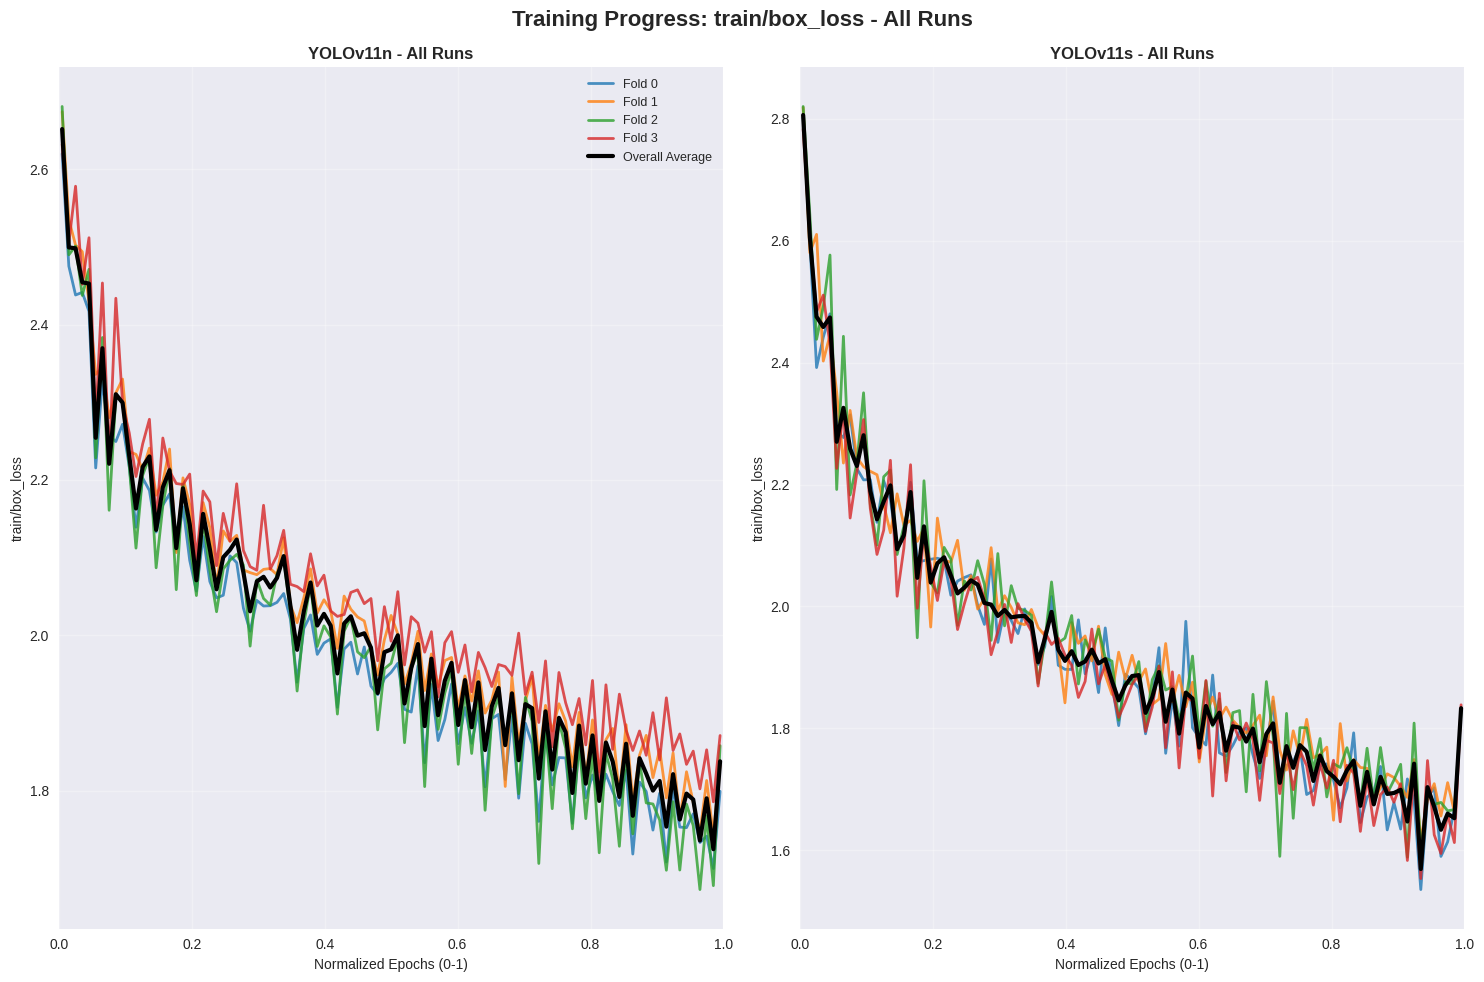

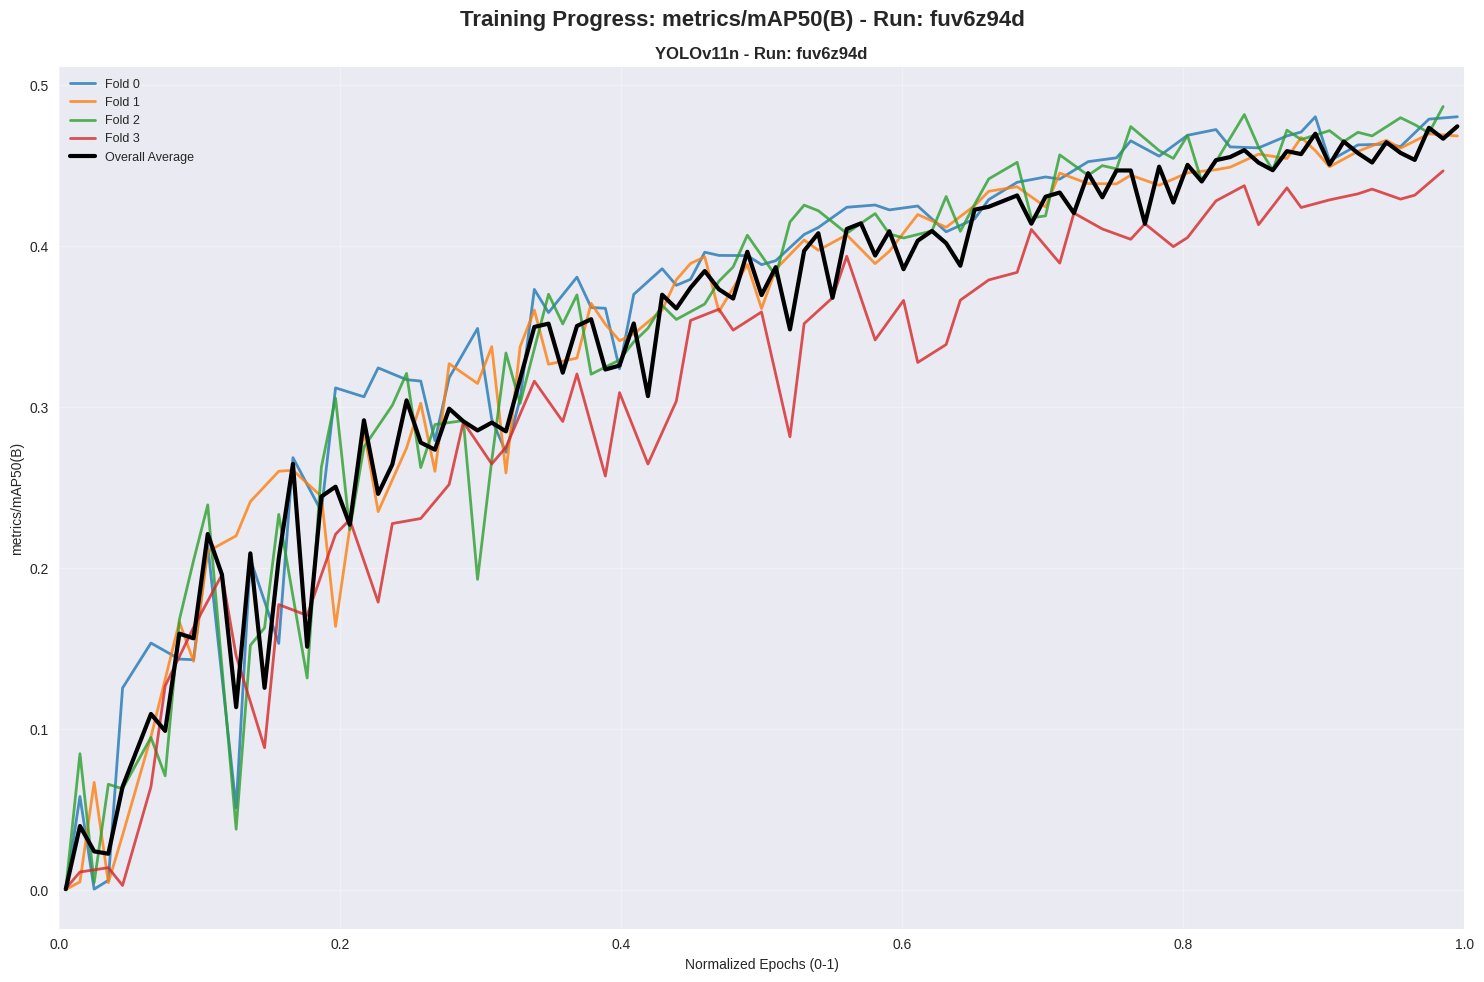

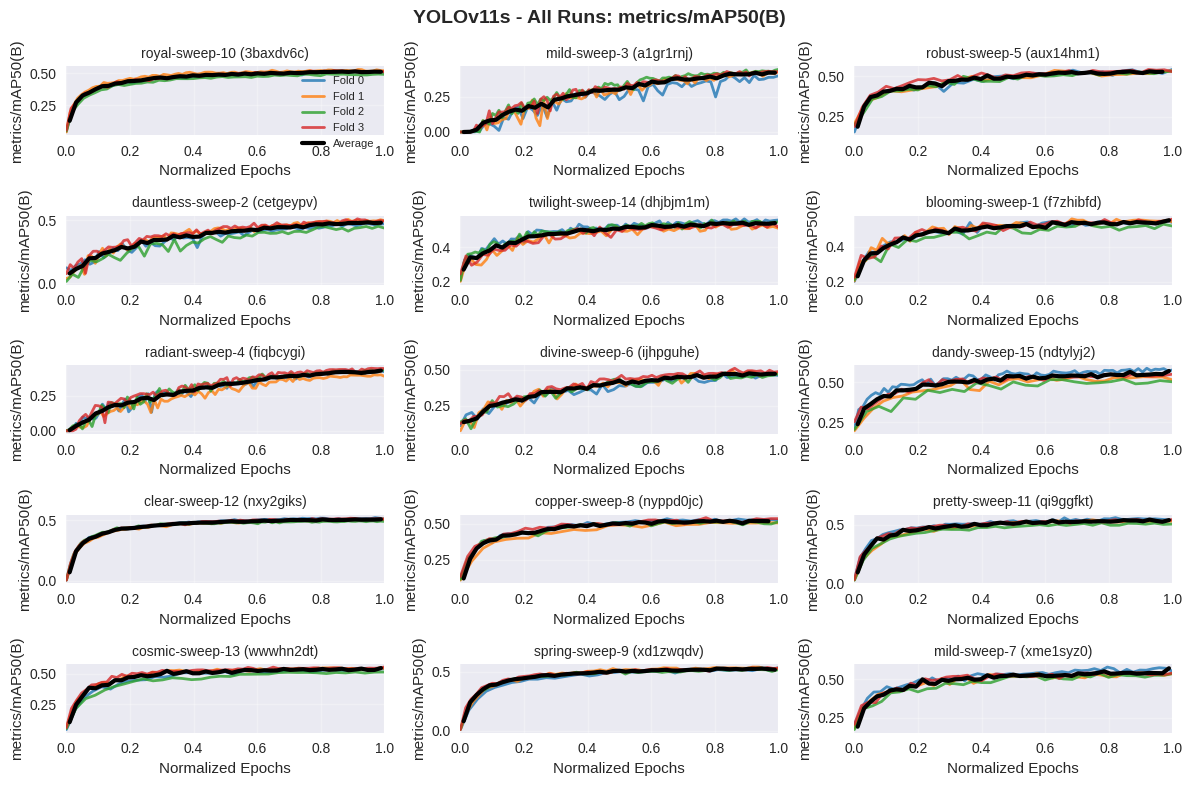

📊 Plot salvato in: map50_comparison.png


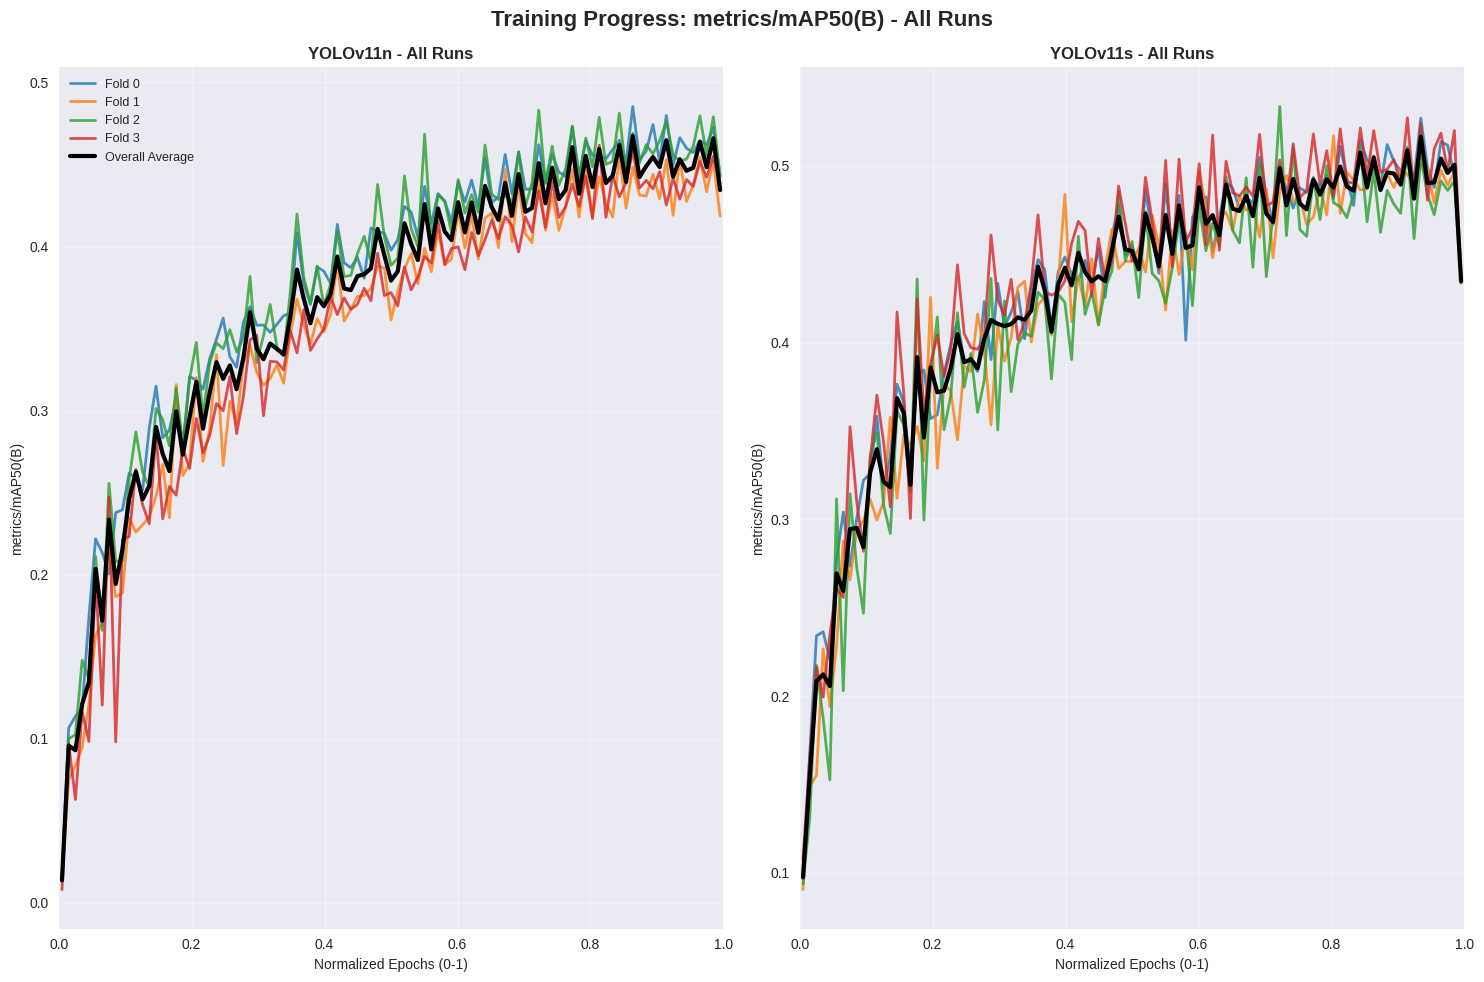

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import to_rgba
import seaborn as sns

def plot_metric_by_model(df, metric_column, run_code=None, figsize=(15, 10), save_path=None):
    """
    Crea subplot per ogni modello mostrando l'andamento di una metrica per fold.
    
    Args:
        df: DataFrame combinato
        metric_column: Nome della colonna metrica da plottare
        run_code: Se specificato, filtra solo per questo run. Se None, usa tutti i run
        figsize: Dimensione della figura
        save_path: Percorso per salvare il plot (opzionale)
    """
    
    # Filtra per run specifico se richiesto
    if run_code:
        df_filtered = df[df['run_code'] == run_code].copy()
        title_suffix = f" - Run: {run_code}"
    else:
        df_filtered = df.copy()
        title_suffix = " - All Runs"
    
    # Verifica che la metrica esista
    if metric_column not in df_filtered.columns:
        print(f"❌ Metrica '{metric_column}' non trovata nel DataFrame")
        return
    
    # Ottieni i modelli unici
    models = sorted(df_filtered['model'].unique())
    
    # Calcola dimensioni subplot
    n_models = len(models)
    cols = min(3, n_models)
    rows = (n_models + cols - 1) // cols
    
    # Crea la figura
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Normalizza axes per gestire tutti i casi
    if n_models == 1:
        axes = np.array([axes])
    axes = np.atleast_2d(axes)
    
    # Colori per i fold
    fold_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    fold_colors_alpha = [to_rgba(color, alpha=0.7) for color in fold_colors]
    
    for idx, model in enumerate(models):
        row = idx // cols
        col = idx % cols
        ax = axes[row, col]
        
        model_data = df_filtered[df_filtered['model'] == model]
        
        if model_data.empty:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{model} - No Data')
            continue
        
        # Raccogli tutti i dati per calcolare statistiche aggregate per fold
        fold_aggregated_data = {fold_num: [] for fold_num in range(4)}
        all_data_for_average = []
        
        # Per ogni run nel modello
        for run in model_data['run_code'].unique():
            run_data = model_data[model_data['run_code'] == run]
            
            # Per ogni fold
            for fold_num in range(4):
                fold_data = run_data[run_data['fold_number'] == fold_num]
                
                if fold_data.empty:
                    continue
                
                # Normalizza le epoche tra 0 e 1
                epochs = fold_data['epoch'].values
                if len(epochs) > 1:
                    normalized_epochs = (epochs - epochs.min()) / (epochs.max() - epochs.min())
                else:
                    normalized_epochs = np.array([0.5])  # Punto centrale se una sola epoca
                
                metric_values = fold_data[metric_column].values
                
                # Aggiungi ai dati aggregati per questo fold
                for norm_epoch, value in zip(normalized_epochs, metric_values):
                    fold_aggregated_data[fold_num].append({
                        'normalized_epoch': norm_epoch,
                        'metric_value': value
                    })
                    all_data_for_average.append({
                        'normalized_epoch': norm_epoch,
                        'metric_value': value,
                        'fold': fold_num
                    })
        
        # Plotta le linee aggregate per ogni fold
        for fold_num in range(4):
            if not fold_aggregated_data[fold_num]:
                continue
            
            fold_df = pd.DataFrame(fold_aggregated_data[fold_num])
            
            # Aggrega i dati in bins per ottenere una curva liscia
            n_bins = 100
            epoch_bins = np.linspace(0, 1, n_bins)
            bin_centers = []
            bin_means = []
            
            for i in range(len(epoch_bins) - 1):
                bin_start, bin_end = epoch_bins[i], epoch_bins[i + 1]
                bin_data = fold_df[
                    (fold_df['normalized_epoch'] >= bin_start) & 
                    (fold_df['normalized_epoch'] < bin_end)
                ]
                
                if not bin_data.empty:
                    bin_centers.append((bin_start + bin_end) / 2)
                    bin_means.append(bin_data['metric_value'].mean())
            
            # Plotta la linea del fold
            if len(bin_centers) > 1:
                ax.plot(bin_centers, bin_means, 
                       color=fold_colors_alpha[fold_num], 
                       linewidth=2, 
                       label=f'Fold {fold_num}',
                       alpha=0.8)
        
        # Calcola e plotta la media generale
        if all_data_for_average:
            avg_df = pd.DataFrame(all_data_for_average)
            
            # Aggrega tutti i dati in bins
            n_bins = 100
            epoch_bins = np.linspace(0, 1, n_bins)
            bin_centers = []
            bin_means = []
            
            for i in range(len(epoch_bins) - 1):
                bin_start, bin_end = epoch_bins[i], epoch_bins[i + 1]
                bin_data = avg_df[
                    (avg_df['normalized_epoch'] >= bin_start) & 
                    (avg_df['normalized_epoch'] < bin_end)
                ]
                
                if not bin_data.empty:
                    bin_centers.append((bin_start + bin_end) / 2)
                    bin_means.append(bin_data['metric_value'].mean())
            
            # Plotta la media generale
            if len(bin_centers) > 1:
                ax.plot(bin_centers, bin_means, 
                       color='black', 
                       linewidth=3, 
                       label='Overall Average',
                       zorder=10)
        
        # Personalizzazione del subplot
        ax.set_title(f'{model}{title_suffix}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Normalized Epochs (0-1)', fontsize=10)
        ax.set_ylabel(metric_column, fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, 1)
        
        # Legenda solo per il primo subplot
        if idx == 0:
            ax.legend(loc='best', fontsize=9)
    
    # Nascondi subplot vuoti
    for idx in range(n_models, rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].set_visible(False)
    
    # Titolo generale
    plt.suptitle(f'Training Progress: {metric_column}{title_suffix}', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"📊 Plot salvato in: {save_path}")
    
    plt.show()

def plot_single_model_all_runs(df, model_name, metric_column, figsize=(12, 8), save_path=None):
    """
    Crea un plot per un singolo modello mostrando tutti i run separatamente.
    Ogni subplot mostra 4 fold + media per un singolo run.
    """
    
    model_data = df[df['model'] == model_name]
    
    if model_data.empty:
        print(f"❌ Nessun dato trovato per il modello {model_name}")
        return
    
    runs = sorted(model_data['run_code'].unique())
    n_runs = len(runs)
    
    # Calcola dimensioni subplot
    cols = min(3, n_runs)
    rows = (n_runs + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Normalizza axes
    if n_runs == 1:
        axes = np.array([axes])
    axes = np.atleast_2d(axes)
    
    fold_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    fold_colors_alpha = [to_rgba(color, alpha=0.7) for color in fold_colors]
    
    for idx, run in enumerate(runs):
        row = idx // cols
        col = idx % cols
        ax = axes[row, col]
        
        run_data = model_data[model_data['run_code'] == run]
        run_name = run_data['run_name'].iloc[0]
        
        # Raccogli dati per ogni fold
        fold_data = {fold_num: [] for fold_num in range(4)}
        all_data = []
        
        for fold_num in range(4):
            fold_subset = run_data[run_data['fold_number'] == fold_num]
            
            if fold_subset.empty:
                continue
            
            # Normalizza epoche
            epochs = fold_subset['epoch'].values
            if len(epochs) > 1:
                normalized_epochs = (epochs - epochs.min()) / (epochs.max() - epochs.min())
            else:
                normalized_epochs = np.array([0.5])
            
            metric_values = fold_subset[metric_column].values
            
            # Salva dati
            for norm_epoch, value in zip(normalized_epochs, metric_values):
                fold_data[fold_num].append({
                    'normalized_epoch': norm_epoch,
                    'metric_value': value
                })
                all_data.append({
                    'normalized_epoch': norm_epoch,
                    'metric_value': value
                })
        
        # Plotta ogni fold
        for fold_num in range(4):
            if not fold_data[fold_num]:
                continue
            
            fold_df = pd.DataFrame(fold_data[fold_num])
            
            # Ordina per epoca normalizzata
            fold_df = fold_df.sort_values('normalized_epoch')
            
            ax.plot(fold_df['normalized_epoch'], fold_df['metric_value'],
                   color=fold_colors_alpha[fold_num], 
                   linewidth=2, 
                   label=f'Fold {fold_num}' if idx == 0 else "",
                   alpha=0.8)
        
        # Plotta media del run
        if all_data:
            all_df = pd.DataFrame(all_data)
            
            # Aggrega in bins
            n_bins = 50
            epoch_bins = np.linspace(0, 1, n_bins)
            bin_centers = []
            bin_means = []
            
            for i in range(len(epoch_bins) - 1):
                bin_start, bin_end = epoch_bins[i], epoch_bins[i + 1]
                bin_data = all_df[
                    (all_df['normalized_epoch'] >= bin_start) & 
                    (all_df['normalized_epoch'] < bin_end)
                ]
                
                if not bin_data.empty:
                    bin_centers.append((bin_start + bin_end) / 2)
                    bin_means.append(bin_data['metric_value'].mean())
            
            if len(bin_centers) > 1:
                ax.plot(bin_centers, bin_means, 
                       color='black', 
                       linewidth=3, 
                       label='Average' if idx == 0 else "",
                       zorder=10)
        
        ax.set_title(f'{run_name} ({run})', fontsize=10)
        ax.set_xlabel('Normalized Epochs')
        ax.set_ylabel(metric_column)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, 1)
        
        if idx == 0:
            ax.legend(loc='best', fontsize=8)
    
    # Nascondi subplot vuoti
    for idx in range(n_runs, rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].set_visible(False)
    
    plt.suptitle(f'{model_name} - All Runs: {metric_column}', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def get_available_metrics(df):
    """
    Restituisce le metriche numeriche disponibili per il plotting.
    """
    # Escludi le colonne identificative
    exclude_cols = ['model', 'run_name', 'run_code', 'fold', 'fold_number', 'epoch', 'time']
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    available_metrics = [col for col in numeric_cols if col not in exclude_cols]
    
    return available_metrics

# Plot di base - tutti i modelli con mAP50
plot_metric_by_model(df, 'metrics/mAP50(B)')

# Plot di training loss
plot_metric_by_model(df, 'train/box_loss')

# Plot per un run specifico
plot_metric_by_model(df, 'metrics/mAP50(B)', run_code='fuv6z94d')

# Plot dettagliato per un modello
plot_single_model_all_runs(df, 'YOLOv11s', 'metrics/mAP50(B)')

# Salva il plot
plot_metric_by_model(df, 'metrics/mAP50(B)', save_path='map50_comparison.png')

In [4]:
# Definizione delle metriche di performance (target da ottimizzare)
performance_metrics = [
    'metrics/mAP50(B)',
    'metrics/mAP50-95(B)', 
    'metrics/precision(B)',
    'metrics/recall(B)'
]

# Definizione delle loss (da minimizzare)
loss_metrics = [
    'train/box_loss',
    'train/cls_loss', 
    'train/dfl_loss',
    'val/box_loss',
    'val/cls_loss',
    'val/dfl_loss'
]

# Iperparametri chiave da analizzare
key_hyperparams = [
    'lr0', 'lrf', 'momentum', 'weight_decay', 'warmup_epochs', 'warmup_bias_lr',
    'box', 'cls', 'dfl', 'epochs', 'batch', 'imgsz', 'augment', 'mosaic', 
    'mixup', 'copy_paste', 'degrees', 'translate', 'scale', 'shear', 'perspective',
    'hsv_h', 'hsv_s', 'hsv_v', 'flipud', 'fliplr', 'erasing', 'crop_fraction'
]

# Filtra solo le colonne presenti nel dataset
available_performance = [col for col in performance_metrics if col in df.columns]
available_loss = [col for col in loss_metrics if col in df.columns]
available_hyperparams = [col for col in key_hyperparams if col in df.columns]

print(f"Metriche di performance disponibili: {available_performance}")
print(f"Metriche di loss disponibili: {available_loss}")
print(f"Iperparametri disponibili: {len(available_hyperparams)}")

Metriche di performance disponibili: ['metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(B)', 'metrics/recall(B)']
Metriche di loss disponibili: ['train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss']
Iperparametri disponibili: 28


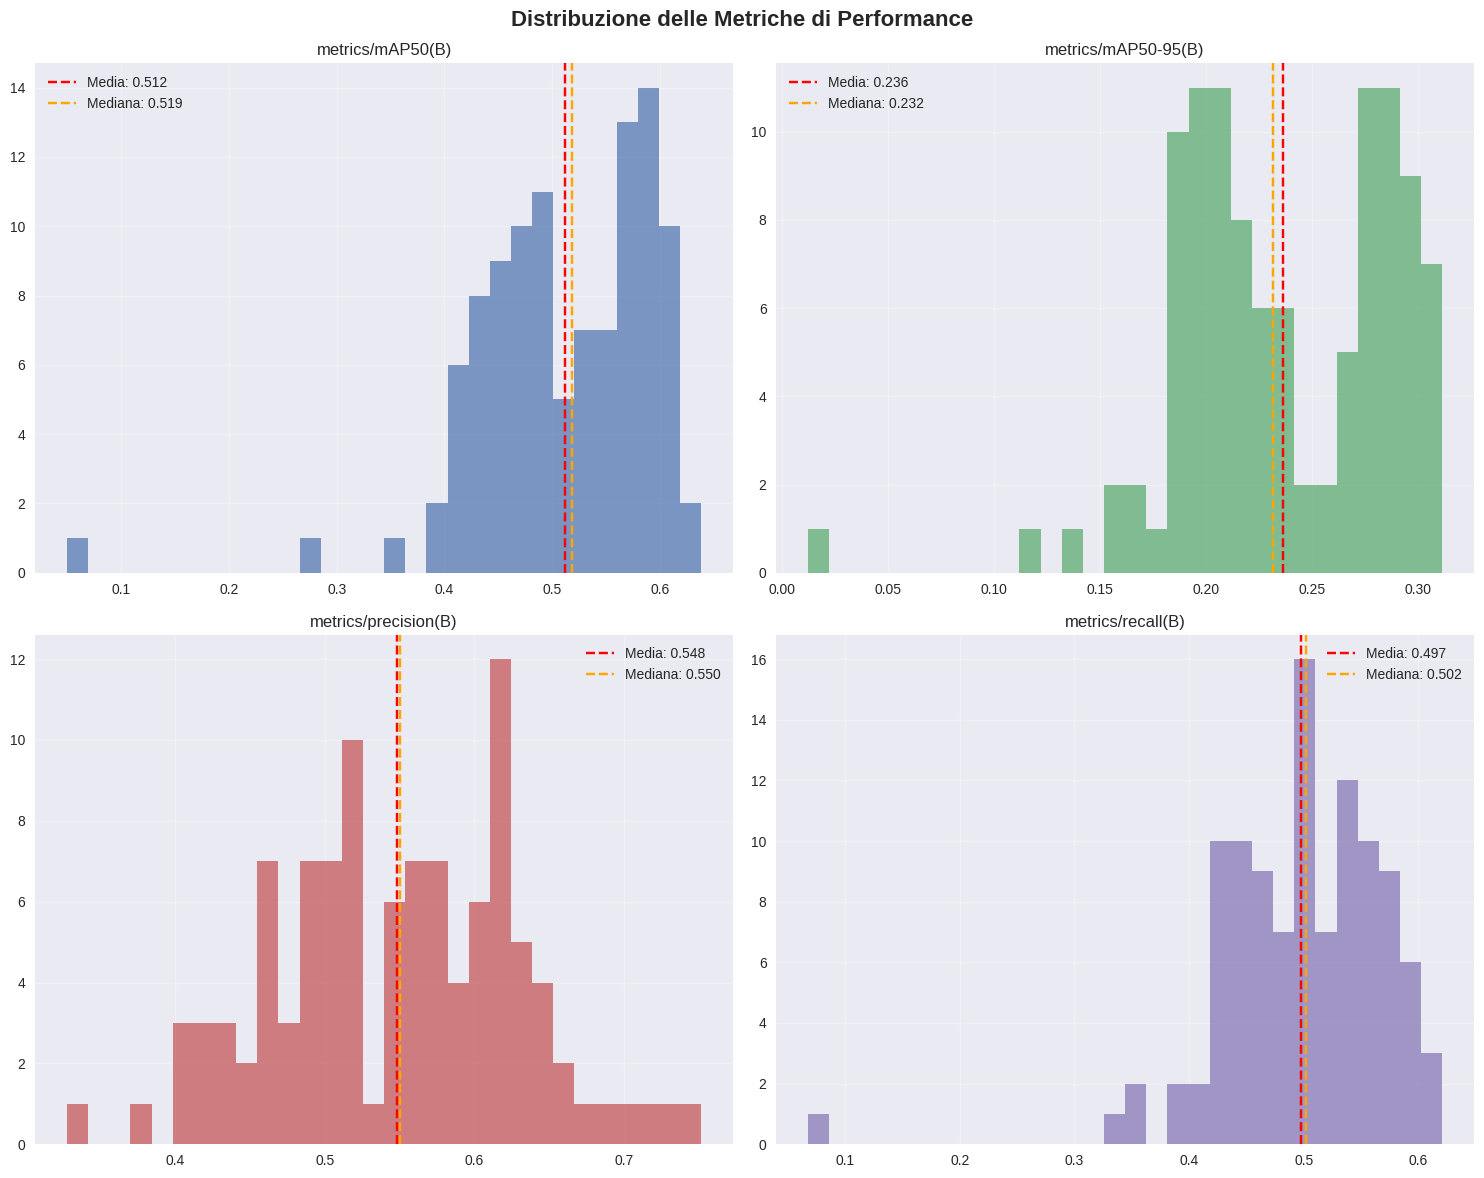

=== STATISTICHE METRICHE DI PERFORMANCE ===

metrics/mAP50(B):
  Media: 0.5118
  Mediana: 0.5188
  Std: 0.0835
  Min: 0.0497
  Max: 0.6385
  Q25: 0.4579
  Q75: 0.5773

metrics/mAP50-95(B):
  Media: 0.2362
  Mediana: 0.2316
  Std: 0.0513
  Min: 0.0121
  Max: 0.3114
  Q25: 0.1968
  Q75: 0.2822

metrics/precision(B):
  Media: 0.5484
  Mediana: 0.5504
  Std: 0.0820
  Min: 0.3274
  Max: 0.7517
  Q25: 0.4874
  Q75: 0.6149

metrics/recall(B):
  Media: 0.4973
  Mediana: 0.5017
  Std: 0.0735
  Min: 0.0675
  Max: 0.6210
  Q25: 0.4535
  Q75: 0.5493


In [5]:
# Distribuzione delle metriche principali
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribuzione delle Metriche di Performance', fontsize=16, fontweight='bold')

for i, metric in enumerate(available_performance[:4]):
    row, col = i // 2, i % 2
    
    # Istogramma
    axes[row, col].hist(df[metric].dropna(), bins=30, alpha=0.7, color=sns.color_palette()[i])
    axes[row, col].axvline(df[metric].mean(), color='red', linestyle='--', 
                          label=f'Media: {df[metric].mean():.3f}')
    axes[row, col].axvline(df[metric].median(), color='orange', linestyle='--', 
                          label=f'Mediana: {df[metric].median():.3f}')
    axes[row, col].set_title(f'{metric}')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiche dettagliate
print("=== STATISTICHE METRICHE DI PERFORMANCE ===")
for metric in available_performance:
    data = df[metric].dropna()
    print(f"\n{metric}:")
    print(f"  Media: {data.mean():.4f}")
    print(f"  Mediana: {data.median():.4f}")
    print(f"  Std: {data.std():.4f}")
    print(f"  Min: {data.min():.4f}")
    print(f"  Max: {data.max():.4f}")
    print(f"  Q25: {data.quantile(0.25):.4f}")
    print(f"  Q75: {data.quantile(0.75):.4f}")

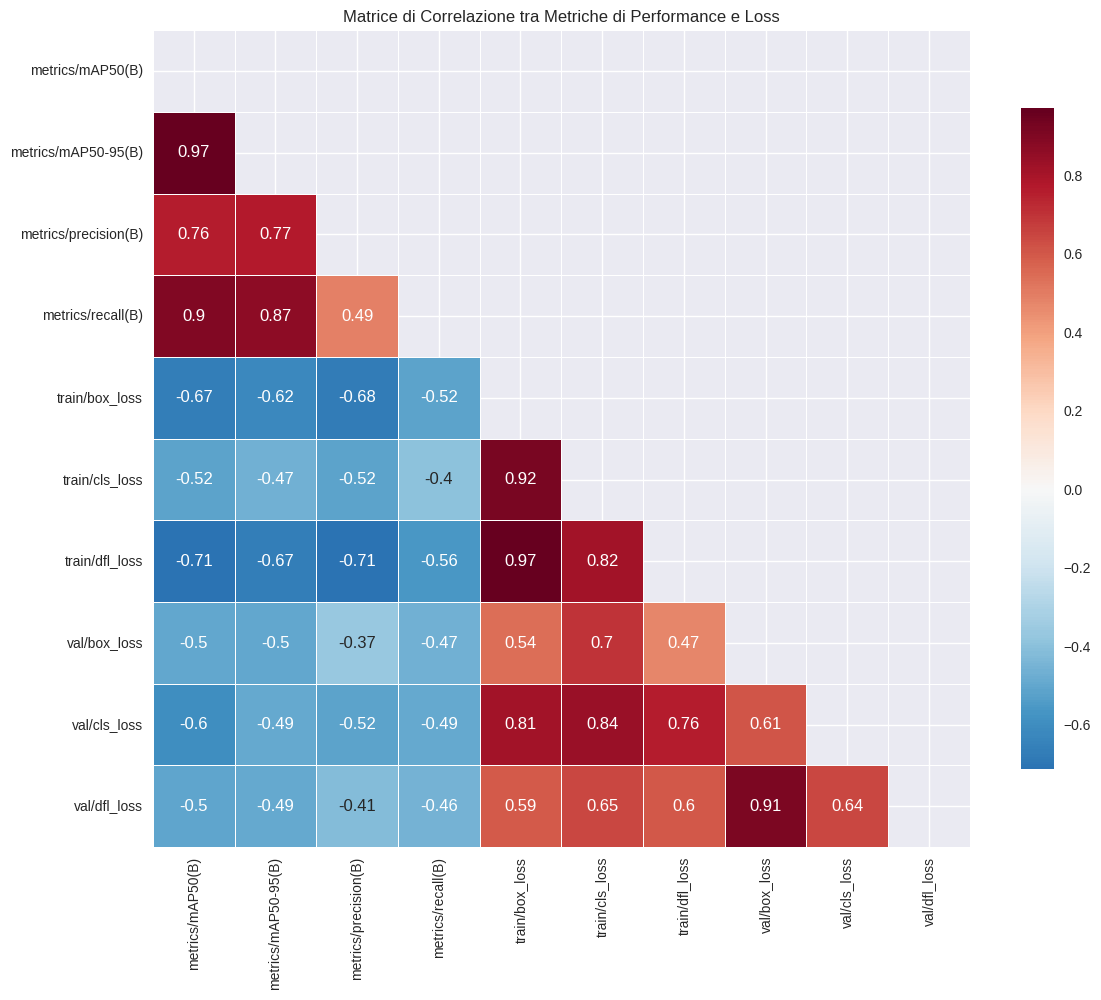

=== CORRELAZIONI PIÙ SIGNIFICATIVE ===
train/box_loss <-> train/dfl_loss: 0.971
metrics/mAP50(B) <-> metrics/mAP50-95(B): 0.967
train/box_loss <-> train/cls_loss: 0.916
val/box_loss <-> val/dfl_loss: 0.911
metrics/mAP50(B) <-> metrics/recall(B): 0.897
metrics/mAP50-95(B) <-> metrics/recall(B): 0.868
train/cls_loss <-> val/cls_loss: 0.837
train/cls_loss <-> train/dfl_loss: 0.815
train/box_loss <-> val/cls_loss: 0.813
metrics/mAP50-95(B) <-> metrics/precision(B): 0.771


In [6]:
# Matrice di correlazione tra tutte le metriche
all_metrics = available_performance + available_loss
correlation_matrix = df[all_metrics].corr()

# Heatmap delle correlazioni
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matrice di Correlazione tra Metriche di Performance e Loss')
plt.tight_layout()
plt.show()

# Trova le correlazioni più forti
print("=== CORRELAZIONI PIÙ SIGNIFICATIVE ===")
corr_pairs = []
for i in range(len(all_metrics)):
    for j in range(i+1, len(all_metrics)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:  # Soglia per correlazioni significative
            corr_pairs.append((all_metrics[i], all_metrics[j], corr_val))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for metric1, metric2, corr in corr_pairs[:10]:
    print(f"{metric1} <-> {metric2}: {corr:.3f}")

In [7]:
# Definisci una metrica composita per ranking
def calculate_composite_score(row):
    """Calcola un punteggio composito basato su tutte le metriche"""
    score = 0
    
    # Aggiungi metriche positive (più alto = meglio)
    for metric in available_performance:
        if pd.notna(row[metric]):
            normalized_val = (row[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
            score += normalized_val
    
    # Sottrai metriche negative (più basso = meglio) 
    for metric in available_loss:
        if pd.notna(row[metric]):
            normalized_val = (row[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
            score -= normalized_val
    
    return score

df['composite_score'] = df.apply(calculate_composite_score, axis=1)

# Top 10 configurazioni
top_10 = df.nlargest(10, 'composite_score')
print("=== TOP 10 CONFIGURAZIONI ===")
print(top_10[['composite_score'] + available_performance + available_loss].round(4))

# Analisi dei top performer
print("\n=== CARATTERISTICHE DEI TOP PERFORMER ===")
top_5 = df.nlargest(5, 'composite_score')
for param in available_hyperparams[:10]:  # Primi 10 iperparametri
    if param in df.columns:
        print(f"\n{param}:")
        print(f"  Top 5 - Media: {top_5[param].mean():.4f}, Std: {top_5[param].std():.4f}")
        print(f"  Tutti - Media: {df[param].mean():.4f}, Std: {df[param].std():.4f}")

=== TOP 10 CONFIGURAZIONI ===
    composite_score  metrics/mAP50(B)  metrics/mAP50-95(B)  \
33           3.4885            0.6145               0.3114   
31           3.3557            0.6385               0.3086   
26           3.2790            0.6324               0.3049   
1            3.2679            0.6083               0.3045   
13           3.0746            0.5821               0.2899   
40           3.0691            0.5964               0.2846   
47           3.0562            0.6049               0.3001   
36           3.0485            0.6068               0.3082   
12           3.0372            0.6023               0.2765   
53           3.0170            0.5853               0.2842   

    metrics/precision(B)  metrics/recall(B)  train/box_loss  train/cls_loss  \
33                0.6610             0.6059          1.2910          0.9111   
31                0.7158             0.5336          1.3142          0.8771   
26                0.6726             0.5650       

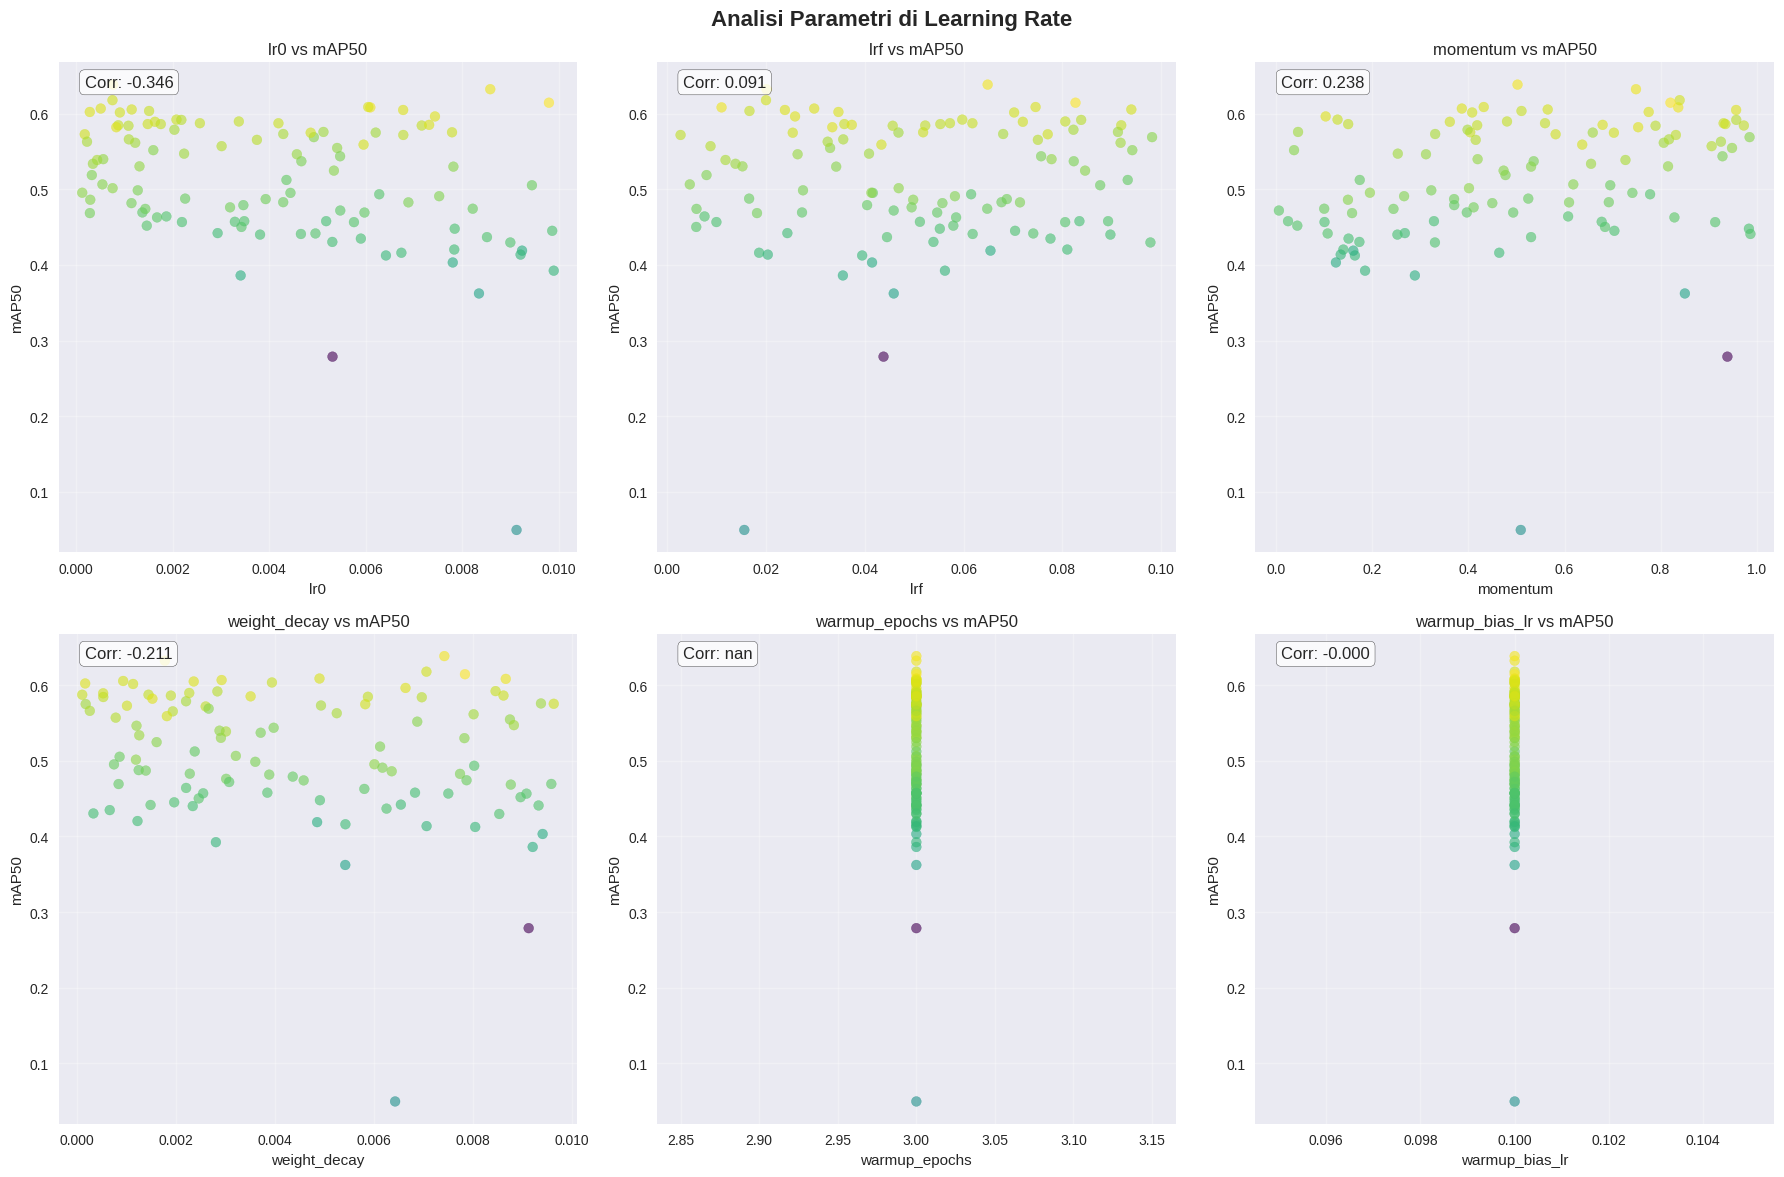

In [8]:
# Analisi dei learning rate parameters
lr_params = ['lr0', 'lrf', 'momentum', 'weight_decay', 'warmup_epochs', 'warmup_bias_lr']
available_lr_params = [p for p in lr_params if p in df.columns]

if available_lr_params:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Analisi Parametri di Learning Rate', fontsize=16, fontweight='bold')
    
    for i, param in enumerate(available_lr_params[:6]):
        row, col = i // 3, i % 3
        
        # Scatter plot con mAP50
        if 'metrics/mAP50(B)' in df.columns:
            scatter = axes[row, col].scatter(df[param], df['metrics/mAP50(B)'], 
                                           alpha=0.6, c=df['composite_score'], 
                                           cmap='viridis', s=50)
            axes[row, col].set_xlabel(param)
            axes[row, col].set_ylabel('mAP50')
            axes[row, col].set_title(f'{param} vs mAP50')
            axes[row, col].grid(True, alpha=0.3)
            
            # Calcola correlazione
            corr = df[param].corr(df['metrics/mAP50(B)'])
            axes[row, col].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                               transform=axes[row, col].transAxes, 
                               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

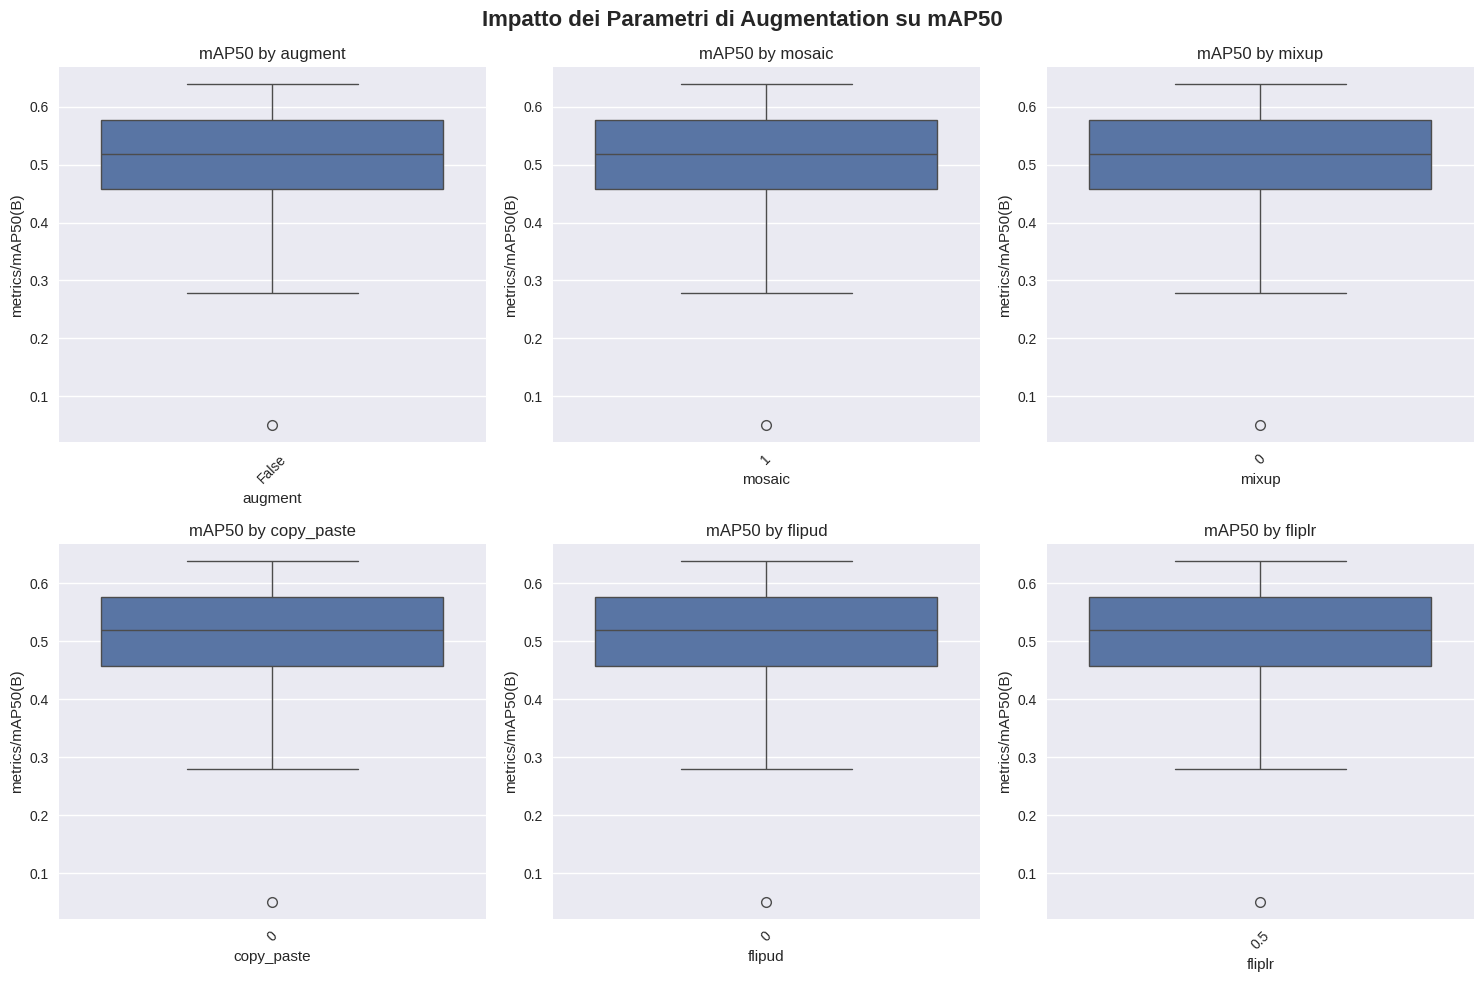

=== CORRELAZIONI PARAMETRI AUGMENTATION CON PERFORMANCE ===
degrees <-> mAP50: nan
translate <-> mAP50: -0.000
scale <-> mAP50: nan
shear <-> mAP50: nan
perspective <-> mAP50: nan
hsv_h <-> mAP50: 0.000
hsv_s <-> mAP50: 0.000
hsv_v <-> mAP50: -0.000
erasing <-> mAP50: -0.000
crop_fraction <-> mAP50: nan


In [9]:
# Parametri di data augmentation
aug_params = ['augment', 'mosaic', 'mixup', 'copy_paste', 'degrees', 'translate', 
              'scale', 'shear', 'perspective', 'hsv_h', 'hsv_s', 'hsv_v', 
              'flipud', 'fliplr', 'erasing', 'crop_fraction']
available_aug_params = [p for p in aug_params if p in df.columns]

# Box plot per parametri categorici di augmentation
categorical_aug = ['augment', 'mosaic', 'mixup', 'copy_paste', 'flipud', 'fliplr']
available_cat_aug = [p for p in categorical_aug if p in df.columns]

if available_cat_aug and 'metrics/mAP50(B)' in df.columns:
    n_plots = len(available_cat_aug)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Impatto dei Parametri di Augmentation su mAP50', fontsize=16, fontweight='bold')
    
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, param in enumerate(available_cat_aug):
        row, col = i // n_cols, i % n_cols
        
        try:
            sns.boxplot(data=df, x=param, y='metrics/mAP50(B)', ax=axes[row, col])
            axes[row, col].set_title(f'mAP50 by {param}')
            axes[row, col].tick_params(axis='x', rotation=45)
        except Exception as e:
            axes[row, col].text(0.5, 0.5, f'Errore: {param}', 
                               ha='center', va='center', transform=axes[row, col].transAxes)
    
    # Nascondi subplot vuoti
    for i in range(n_plots, n_rows * n_cols):
        row, col = i // n_cols, i % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Analisi dei parametri numerici di augmentation
numeric_aug = ['degrees', 'translate', 'scale', 'shear', 'perspective', 
               'hsv_h', 'hsv_s', 'hsv_v', 'erasing', 'crop_fraction']
available_num_aug = [p for p in numeric_aug if p in df.columns]

print("=== CORRELAZIONI PARAMETRI AUGMENTATION CON PERFORMANCE ===")
for param in available_num_aug:
    if 'metrics/mAP50(B)' in df.columns:
        corr = df[param].corr(df['metrics/mAP50(B)'])
        print(f"{param} <-> mAP50: {corr:.3f}")

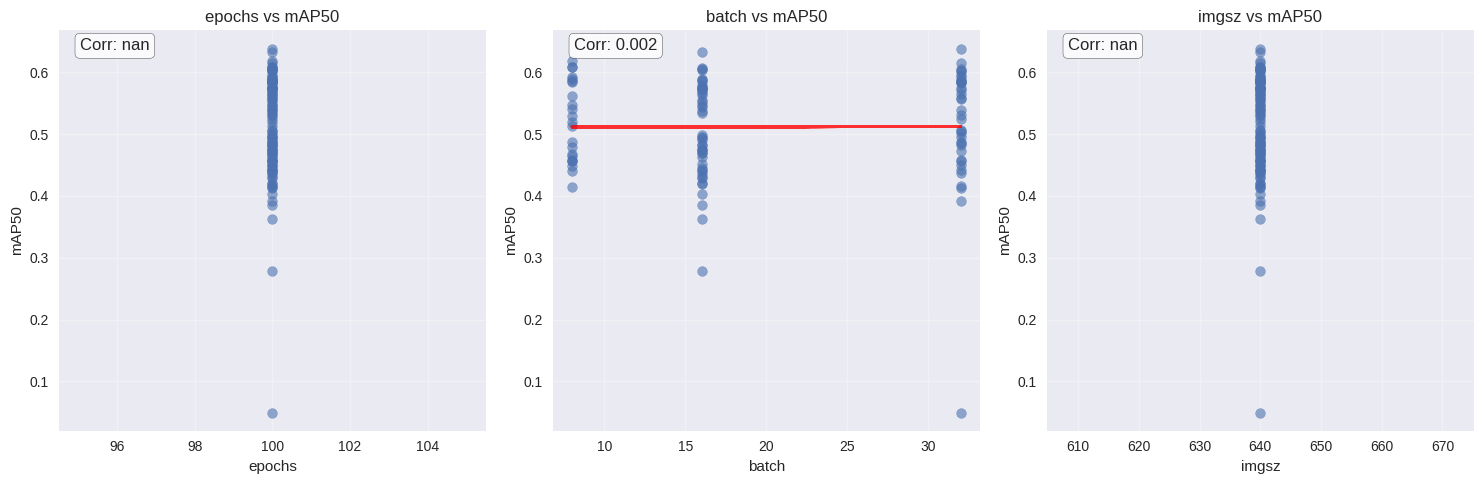

=== TRADE-OFF PERFORMANCE vs COMPLESSITÀ ===
model/GFLOPs <-> mAP50: 0.082
model/parameters <-> mAP50: -0.082
model/speed_PyTorch(ms) <-> mAP50: -0.184


In [10]:
# Parametri di architettura e training
model_params = ['epochs', 'batch', 'imgsz']
available_model_params = [p for p in model_params if p in df.columns]

if available_model_params:
    fig, axes = plt.subplots(1, len(available_model_params), figsize=(5*len(available_model_params), 5))
    if len(available_model_params) == 1:
        axes = [axes]
    
    for i, param in enumerate(available_model_params):
        if 'metrics/mAP50(B)' in df.columns:
            # Scatter plot con trend line
            x = df[param].dropna()
            y = df['metrics/mAP50(B)'][df[param].notna()]
            
            axes[i].scatter(x, y, alpha=0.6, s=50)
            
            # Aggiungi trend line
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            axes[i].plot(x, p(x), "r--", alpha=0.8)
            
            axes[i].set_xlabel(param)
            axes[i].set_ylabel('mAP50')
            axes[i].set_title(f'{param} vs mAP50')
            axes[i].grid(True, alpha=0.3)
            
            # Correlazione
            corr = df[param].corr(df['metrics/mAP50(B)'])
            axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                        transform=axes[i].transAxes,
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Analisi delle dimensioni del modello e velocità
model_metrics = ['model/GFLOPs', 'model/parameters', 'model/speed_PyTorch(ms)']
available_model_metrics = [m for m in model_metrics if m in df.columns]

if available_model_metrics:
    print("=== TRADE-OFF PERFORMANCE vs COMPLESSITÀ ===")
    for metric in available_model_metrics:
        if 'metrics/mAP50(B)' in df.columns:
            corr = df[metric].corr(df['metrics/mAP50(B)'])
            print(f"{metric} <-> mAP50: {corr:.3f}")

=== ANALISI DEI CLUSTER ===

Cluster 0 (n=15):
  mAP50 medio: 0.5255
  mAP50 std: 0.0596
  Composite Score medio: 2.1245
  Caratteristiche principali:
    lr0: 0.002 (vs globale: 0.004)
    lrf: 0.067 (vs globale: 0.051)
    momentum: 0.272 (vs globale: 0.508)
    weight_decay: 0.004 (vs globale: 0.004)

Cluster 1 (n=17):
  mAP50 medio: 0.5559
  mAP50 std: 0.0551
  Composite Score medio: 2.5432
  Caratteristiche principali:
    lr0: 0.004 (vs globale: 0.004)
    lrf: 0.026 (vs globale: 0.051)
    momentum: 0.781 (vs globale: 0.508)
    weight_decay: 0.003 (vs globale: 0.004)

Cluster 2 (n=25):
  mAP50 medio: 0.4610
  mAP50 std: 0.1208
  Composite Score medio: 1.2858
  Caratteristiche principali:
    lr0: 0.007 (vs globale: 0.004)
    weight_decay: 0.007 (vs globale: 0.004)

Cluster 3 (n=21):
  mAP50 medio: 0.5078
  mAP50 std: 0.0624
  Composite Score medio: 1.8367
  Caratteristiche principali:
    lr0: 0.002 (vs globale: 0.004)
    lrf: 0.027 (vs globale: 0.051)
    momentum: 0.443 (vs

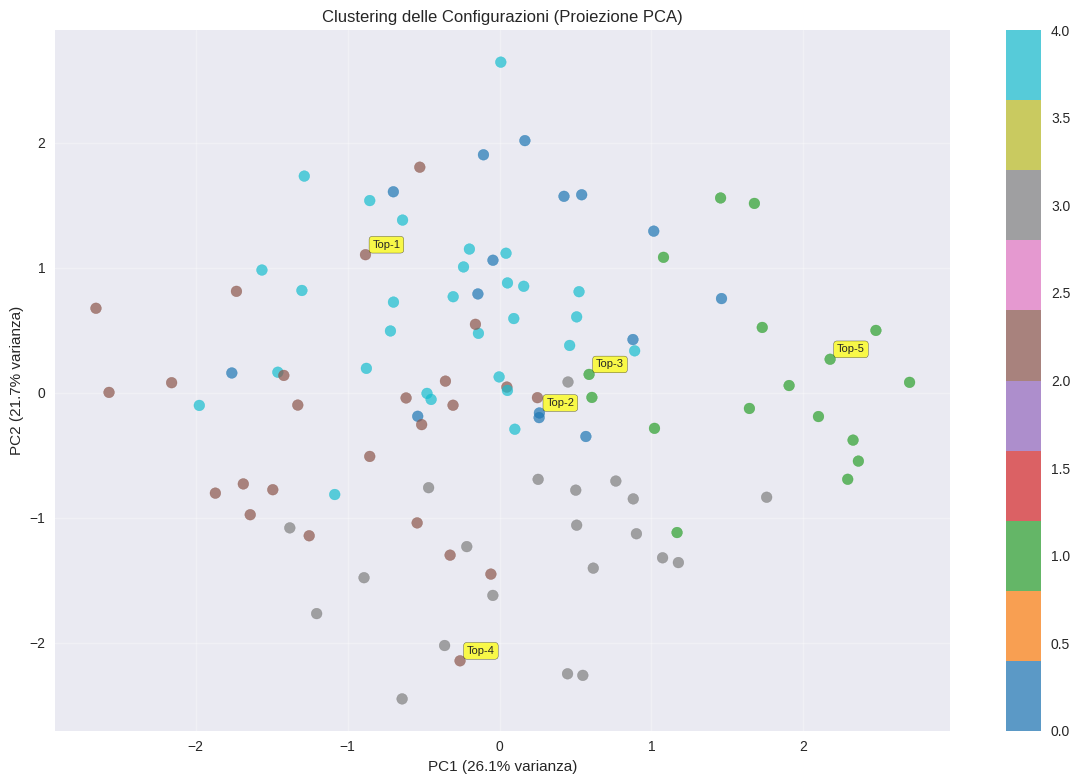

In [11]:
# Prepara i dati per clustering
cluster_features = available_hyperparams[:15]  # Usa i primi 15 iperparametri
cluster_data = df[cluster_features].fillna(df[cluster_features].mean())

# Standardizza i dati
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Applica K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Analizza i cluster
print("=== ANALISI DEI CLUSTER ===")
for cluster_id in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} (n={len(cluster_data)}):")
    
    if 'metrics/mAP50(B)' in df.columns:
        print(f"  mAP50 medio: {cluster_data['metrics/mAP50(B)'].mean():.4f}")
        print(f"  mAP50 std: {cluster_data['metrics/mAP50(B)'].std():.4f}")
    
    print(f"  Composite Score medio: {cluster_data['composite_score'].mean():.4f}")
    
    # Caratteristiche distintive del cluster
    print("  Caratteristiche principali:")
    for param in cluster_features[:5]:
        mean_val = cluster_data[param].mean()
        global_mean = df[param].mean()
        if abs(mean_val - global_mean) > 0.1 * df[param].std():
            print(f"    {param}: {mean_val:.3f} (vs globale: {global_mean:.3f})")

# Visualizza i cluster con PCA
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(cluster_data_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(cluster_pca[:, 0], cluster_pca[:, 1], 
                     c=df['cluster'], cmap='tab10', alpha=0.7, s=60)
plt.colorbar(scatter)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('Clustering delle Configurazioni (Proiezione PCA)')
plt.grid(True, alpha=0.3)

# Aggiungi etichette per i top performer
top_5_indices = df.nlargest(5, 'composite_score').index
for idx in top_5_indices:
    plt.annotate(f'Top-{list(top_5_indices).index(idx)+1}', 
                xy=(cluster_pca[idx, 0], cluster_pca[idx, 1]),
                xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=8)

plt.tight_layout()
plt.show()

0.0098990984374759
0.0981443226207957
0.987281463463806
0.0096332925575265
3
0.1
7.5
0.5
1.5
100
32
640
False
1
0
0
0
0.1
0.5
0
0
0.015
0.7
0.4
0
0.5
0.4
1


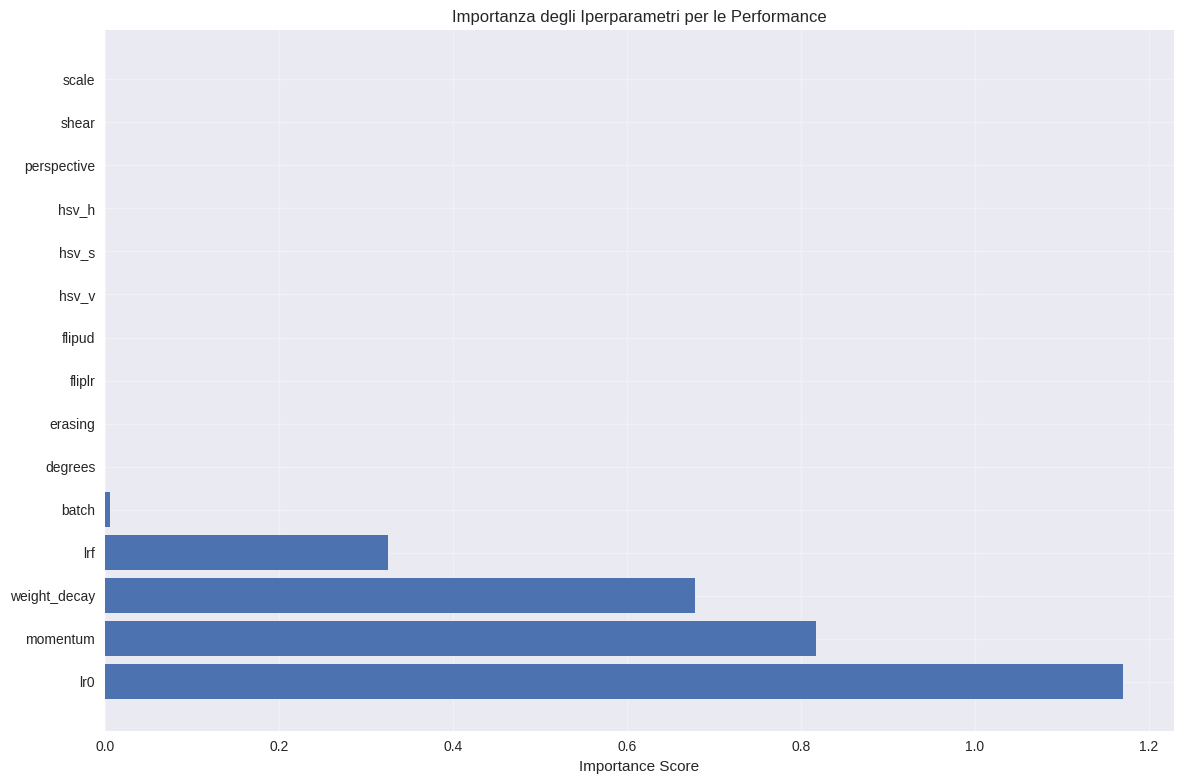

=== RANKING IMPORTANZA IPERPARAMETRI ===
 1. lr0: 1.1702
 2. momentum: 0.8177
 3. weight_decay: 0.6783
 4. lrf: 0.3258
 5. batch: 0.0061
 6. degrees: 0.0000
 7. erasing: 0.0000
 8. fliplr: 0.0000
 9. flipud: 0.0000
10. hsv_v: 0.0000


In [14]:
# Calcola l'importanza degli iperparametri basata sulla varianza delle performance
def calculate_hyperparameter_importance():
    importance_scores = {}
    
    for param in available_hyperparams:
        if param in df.columns and 'metrics/mAP50(B)' in df.columns:
            # Calcola la correlazione assoluta
            corr = abs(df[param].corr(df['metrics/mAP50(B)']))
            
            # Calcola l'effetto della variazione del parametro
            param_std = df[param].std()
            print(df[param].max())
            param_range = df[param].max() - df[param].min() if df[param].max() and df[param].min() else 0
            
            # Score combinato
            importance_scores[param] = corr * (param_range / param_std) if param_std > 0 else 0
    
    return importance_scores

importance = calculate_hyperparameter_importance()
importance_df = pd.DataFrame(list(importance.items()), 
                           columns=['Parameter', 'Importance']).sort_values('Importance', ascending=False)

# Visualizza l'importanza degli iperparametri
plt.figure(figsize=(12, 8))
top_params = importance_df.head(15)
plt.barh(range(len(top_params)), top_params['Importance'])
plt.yticks(range(len(top_params)), top_params['Parameter'])
plt.xlabel('Importance Score')
plt.title('Importanza degli Iperparametri per le Performance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=== RANKING IMPORTANZA IPERPARAMETRI ===")
for i, (param, score) in enumerate(importance_df.head(10).values):
    print(f"{i+1:2d}. {param}: {score:.4f}")

In [15]:
# Identifica la configurazione ottimale
best_config = df.loc[df['composite_score'].idxmax()]

print("="*60)
print("🎯 CONFIGURAZIONE OTTIMALE IDENTIFICATA")
print("="*60)

print(f"Composite Score: {best_config['composite_score']:.4f}")
print(f"Run ID: {best_config.get('run_id', 'N/A')}")

print("\n📊 METRICHE DI PERFORMANCE:")
for metric in available_performance:
    print(f"  {metric}: {best_config[metric]:.4f}")

print("\n📉 LOSS VALUES:")
for metric in available_loss:
    print(f"  {metric}: {best_config[metric]:.4f}")

print("\n⚙️ IPERPARAMETRI CHIAVE:")
important_params = importance_df.head(10)['Parameter'].values
for param in important_params:
    if param in df.columns:
        print(f"  {param}: {best_config[param]}")

# Confronta con la media
print("\n" + "="*60)
print("📈 CONFRONTO CON LA MEDIA DEL DATASET")
print("="*60)

for metric in available_performance:
    improvement = ((best_config[metric] - df[metric].mean()) / df[metric].mean()) * 100
    print(f"{metric}: {improvement:+.2f}% rispetto alla media")

# Analisi di robustezza
print("\n" + "="*60)
print("🔍 ANALISI DI ROBUSTEZZA")
print("="*60)

# Trova configurazioni simili alla migliore
similarity_threshold = 0.8
similar_configs = []

for idx, row in df.iterrows():
    if idx != df['composite_score'].idxmax():
        similarity = 0
        count = 0
        for param in important_params[:5]:  # Usa i 5 parametri più importanti
            if param in df.columns:
                if abs(row[param] - best_config[param]) / (df[param].std() + 1e-6) < 1:
                    similarity += 1
                count += 1
        
        if count > 0 and similarity / count >= similarity_threshold:
            similar_configs.append((idx, row['composite_score']))

if similar_configs:
    print(f"Trovate {len(similar_configs)} configurazioni simili con performance comparabili")
    similar_scores = [score for _, score in similar_configs]
    print(f"Score medio configurazioni simili: {np.mean(similar_scores):.4f}")
    print(f"Deviazione standard: {np.std(similar_scores):.4f}")
else:
    print("⚠️  La configurazione ottimale è unica - potrebbe essere overfitting")

# Raccomandazioni finali
print("\n" + "="*60)
print("💡 RACCOMANDAZIONI FINALI")
print("="*60)

print("1. CONFIGURAZIONE RACCOMANDATA:")
print("   Usa la configurazione ottimale identificata sopra")

print("\n2. PARAMETRI CRITICI DA MONITORARE:")
for i, param in enumerate(important_params[:5]):
    print(f"   {i+1}. {param}")

print("\n3. SUGGERIMENTI PER ULTERIORI ESPERIMENTI:")
print("   - Fai fine-tuning attorno ai valori ottimali identificati")
print("   - Testa combinazioni degli iperparametri più importanti")
print("   - Considera l'early stopping se non già implementato")

if len(similar_configs) < 3:
    print("   - Aumenta il numero di esperimenti per validare la robustezza")

print("\n4. TRADE-OFF DA CONSIDERARE:")
if 'model/speed_PyTorch(ms)' in df.columns:
    speed_corr = df['model/speed_PyTorch(ms)'].corr(df['metrics/mAP50(B)'])
    if speed_corr > 0.3:
        print("   - Performance vs Velocità di inferenza (correlazione positiva)")
    elif speed_corr < -0.3:
        print("   - Performance vs Velocità di inferenza (correlazione negativa)")

if 'model/parameters' in df.columns:
    param_corr = df['model/parameters'].corr(df['metrics/mAP50(B)'])
    if param_corr > 0.3:
        print("   - Performance vs Dimensione modello (più parametri = migliori performance)")
    elif param_corr < -0.3:
        print("   - Performance vs Dimensione modello (meno parametri = migliori performance)")

print("\n" + "="*60)
print("✅ ANALISI COMPLETATA")
print("="*60)

🎯 CONFIGURAZIONE OTTIMALE IDENTIFICATA
Composite Score: 3.4885
Run ID: 1ts1d6um

📊 METRICHE DI PERFORMANCE:
  metrics/mAP50(B): 0.6145
  metrics/mAP50-95(B): 0.3114
  metrics/precision(B): 0.6610
  metrics/recall(B): 0.6059

📉 LOSS VALUES:
  train/box_loss: 1.2910
  train/cls_loss: 0.9111
  train/dfl_loss: 1.1098
  val/box_loss: 1.9817
  val/cls_loss: 1.6511
  val/dfl_loss: 1.5086

⚙️ IPERPARAMETRI CHIAVE:
  lr0: 0.009799360489695
  momentum: 0.8206979179968263
  weight_decay: 0.007840277810131
  lrf: 0.0826529546355827
  batch: 32
  degrees: 0
  erasing: 0.4
  fliplr: 0.5
  flipud: 0
  hsv_v: 0.4

📈 CONFRONTO CON LA MEDIA DEL DATASET
metrics/mAP50(B): +20.07% rispetto alla media
metrics/mAP50-95(B): +31.83% rispetto alla media
metrics/precision(B): +20.54% rispetto alla media
metrics/recall(B): +21.83% rispetto alla media

🔍 ANALISI DI ROBUSTEZZA
Trovate 1 configurazioni simili con performance comparabili
Score medio configurazioni simili: 1.6072
Deviazione standard: 0.0000

💡 RACCOMA

In [16]:
# Salva i risultati dell'analisi
results_summary = {
    'best_config_index': df['composite_score'].idxmax(),
    'best_composite_score': df['composite_score'].max(),
    'hyperparameter_importance': importance_df.head(10).to_dict(),
    'top_10_configs': top_10[available_performance + available_loss + ['composite_score']].to_dict(),
    'cluster_analysis': df.groupby('cluster')['composite_score'].agg(['mean', 'std', 'count']).to_dict()
}

# Salva la configurazione ottimale in un file separato
optimal_config = best_config[available_hyperparams].to_dict()

print("💾 Per salvare i risultati, decommenta le righe seguenti:")
print("# import json")
print("# with open('yolo_eda_results.json', 'w') as f:")
print("#     json.dump(results_summary, f, indent=2)")
print("# ")
print("# with open('optimal_yolo_config.json', 'w') as f:")
print("#     json.dump(optimal_config, f, indent=2)")

print("\n🎉 EDA completata! Usa le raccomandazioni sopra per ottimizzare il tuo modello YOLO.")

💾 Per salvare i risultati, decommenta le righe seguenti:
# import json
# with open('yolo_eda_results.json', 'w') as f:
#     json.dump(results_summary, f, indent=2)
# 
# with open('optimal_yolo_config.json', 'w') as f:
#     json.dump(optimal_config, f, indent=2)

🎉 EDA completata! Usa le raccomandazioni sopra per ottimizzare il tuo modello YOLO.
